# Практические задания по цифровой обработке сигналов
# Четвертая лабораторная работа </center>
# Акустические признаки </center>

In [16]:
!pip install librosa==0.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0


In [1]:
import librosa
import numpy as np
import scipy
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib
from glob import glob
import os
import sklearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Функция отрисовки аудио сигнала

In [2]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveplot(wav, sr=sr)
    plt.show()

Код вызывает ошибку при открытии файла AttributeError: module 'librosa.display' has no attribute 'waveplot'
<Figure size 1400x500 with 0 Axes>, поэтому было принято решение заменить его на код ниже

In [3]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)  # Используем waveshow вместо waveplot
    plt.show()

In [6]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    time = np.arange(len(wav)) / sr
    plt.plot(time, wav)
    plt.show()

### Для выполнения задания нам понадобится датасет *yes/no*.
Про датасет можно почитать тут https://www.openslr.org/1/

In [ ]:
# Скачаем его
#  надёжнее использовать скачивание вручную, либо попробовать строчку ниже
#![ ! -f  waves_yesno.tar.gz ] && wget https://www.openslr.org/resources/1/waves_yesno.tar.gz
# И распакуем
!tar -xvzf waves_yesno.tar.gz

In [3]:
![ ! -f  waves_yesno.tar.gz ] && wget https://www.openslr.org/resources/1/waves_yesno.tar.gz

In [4]:
!tar -xvzf waves_yesno.tar.gz

waves_yesno/
waves_yesno/1_0_0_0_0_0_1_1.wav
waves_yesno/1_1_0_0_1_0_1_0.wav
waves_yesno/1_0_1_1_1_1_0_1.wav
waves_yesno/1_1_1_1_0_1_0_0.wav
waves_yesno/0_0_1_1_1_0_0_0.wav
waves_yesno/0_1_1_1_1_1_1_1.wav
waves_yesno/0_1_0_1_1_1_0_0.wav
waves_yesno/1_0_1_1_1_0_1_0.wav
waves_yesno/1_0_0_1_0_1_1_1.wav
waves_yesno/0_0_1_0_1_0_0_0.wav
waves_yesno/0_1_0_1_1_0_1_0.wav
waves_yesno/0_0_1_1_0_1_1_0.wav
waves_yesno/1_0_0_0_1_0_0_1.wav
waves_yesno/1_1_0_1_1_1_1_0.wav
waves_yesno/0_0_1_1_1_1_0_0.wav
waves_yesno/1_1_0_0_1_1_1_0.wav
waves_yesno/0_0_1_1_0_1_1_1.wav
waves_yesno/1_1_0_1_0_1_1_0.wav
waves_yesno/0_1_0_0_0_1_1_0.wav
waves_yesno/0_0_0_1_0_0_0_1.wav
waves_yesno/0_0_1_0_1_0_1_1.wav
waves_yesno/0_0_1_0_0_0_1_0.wav
waves_yesno/1_1_0_1_1_0_0_1.wav
waves_yesno/0_1_1_1_0_1_0_1.wav
waves_yesno/0_1_1_1_0_0_0_0.wav
waves_yesno/README~
waves_yesno/0_1_0_0_0_1_0_0.wav
waves_yesno/1_0_0_0_0_0_0_1.wav
waves_yesno/1_1_0_1_1_0_1_1.wav
waves_yesno/1_1_0_0_0_0_0_1.wav
waves_yesno/1_0_0_0_0_0_0_0.wav
waves_y

P.S если у вас Windows, или по каким-либо еще причинам данные не скачались,
то их можно скачать руками отсюда: https://www.openslr.org/1/

### Загрузим один из файлов

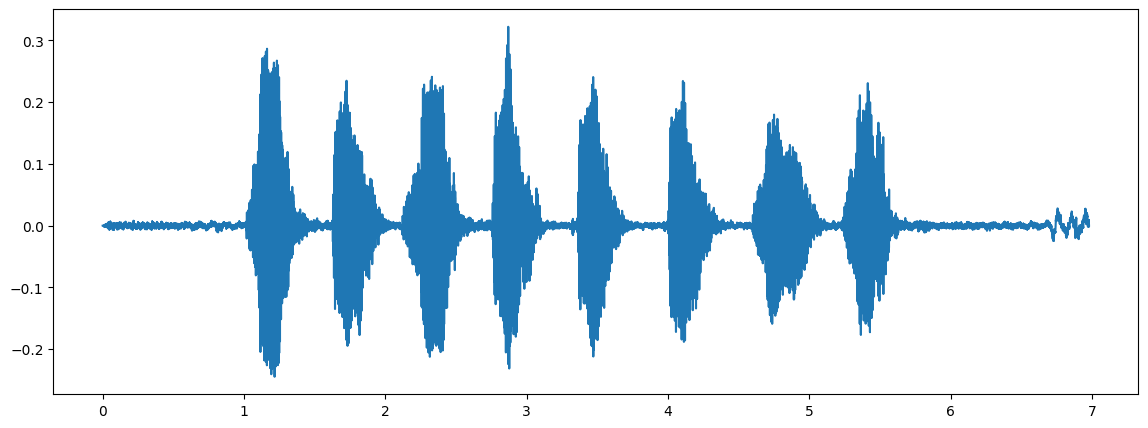

In [7]:
wav, sr = librosa.load("waves_yesno/0_1_0_1_1_1_0_0.wav")
draw_waveform(wav, sr)
ipd.Audio(wav, rate=sr)

Как можно услышать, в этом датасете произносятся какие-то два слова (yes/no на иврите). Каждый файл состоит из 8 произнесений. Метки слов указаны в названиях файлов.

Построим спектрограмму загруженной вавки

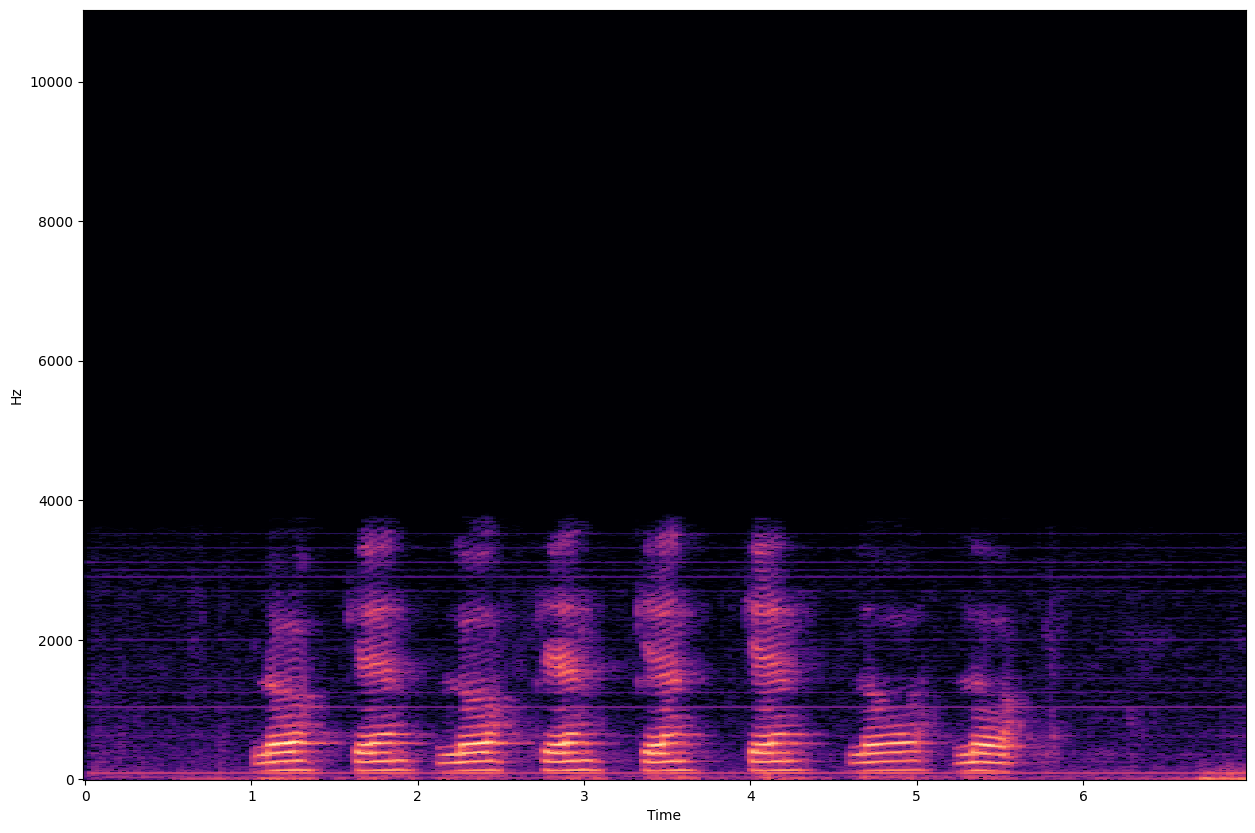

In [8]:
stft = librosa.stft(wav)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

# Задание 0.1: Анализ спектрограммы (0.5 балла)
1. Посмотрите на спектрограмму и попробуйте найти признаки, по которым можно отличить произнесение "yes" от "no".
1. В каких частотах находится основная энергия этого речевого сигнала?

### 1. Посмотрите на спектрограмму и попробуйте найти признаки, по которым можно отличить произнесение "yes" от "no".

Ключевой признак заключается в относительном положении второй форманты (F2) в гласном звуке:

- "Кен" (Yes, /ɛ/): F2 выше (примерно $\approx 1800-2000$ Гц), что характерно для переднего гласного.

- "Ло" (No, /o/): F2 ниже (примерно $\approx 1000-1200$ Гц), что характерно для заднего гласного.Взгляд на спектрограмму показывает, что в половине произнесений вторая яркая полоса (F2) расположена заметно выше, чем в другой половине, что является прямым отражением этого фонетического различия.

ДОБАВИТЬ ПРО ВЫПИРАЮЩУЮ ШТУЧКУ ВНАЧАЛЕ СЛОВА ЛЕ!!!!

### 2. В каких частотах находится основная энергия этого речевого сигнала?


Основная энергия (наибольшая акустическая мощность) этого речевого сигнала сосредоточена в диапазоне:$$\mathbf{0 \text{ Гц до } \approx 4000 \text{ Гц}}$$

Причины:

Форманты (F1, F2, F3): Самые яркие (наиболее энергетичные) горизонтальные полосы, называемые формантами, лежат в этой области (F1: $\approx 0-1000$ Гц; F2: $\approx 1000-2500$ Гц; F3: $\approx 2500-3500$ Гц).

Именно форманты гласных несут большую часть мощности и лингвистической информации в речи.

Визуальное подтверждение: На спектрограмме видно, что выше 4000 Гц интенсивность сигнала (яркость) резко падает, и фон становится практически черным, что указывает на отсутствие значимой энергии в ультразвуковом диапазоне.

# Задание 1: Мел-шкала (1 балл)
Нарисовать спектрограму в [mel-шкале](https://en.wikipedia.org/wiki/Mel_scale).
Использовать формулу, представленную Дугласом О'Шонесси.

In [9]:
def mel(spec):
    #spec - stft spectrogram
    # Преобразование Герц -> Мел по формуле О'Шонесси: mel = 2595 * log10(1 + f/700)
    mel_spec = 2595.0 * np.log10(1.0 + spec / 700.0)

    return mel_spec

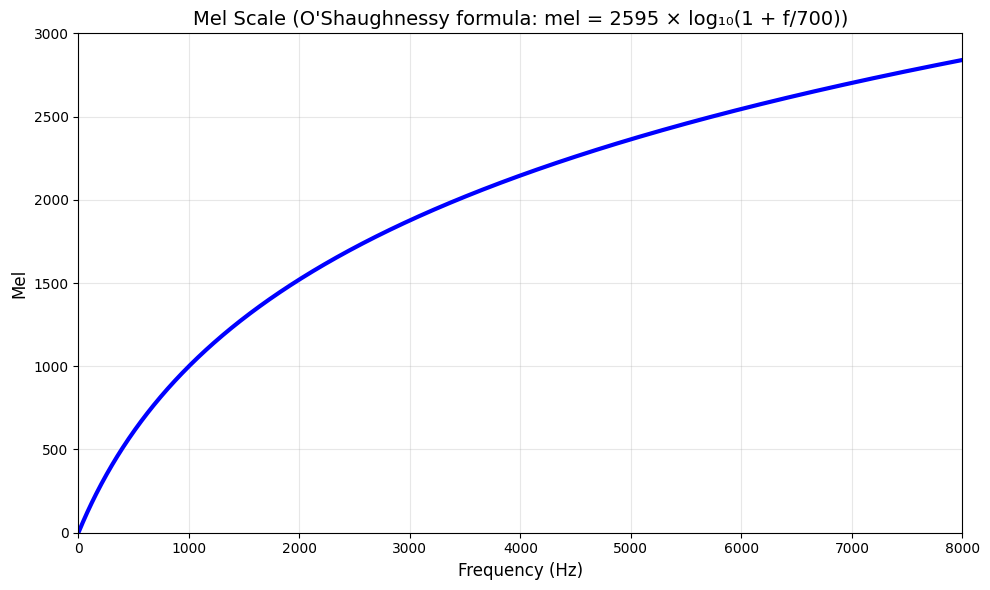

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_mel_scale():
    # Создаем тестовые частоты от 0 до 8000 Гц
    frequencies = np.linspace(0, 8000, 1000)

    # Применяем преобразование Герц -> Мел по формуле О'Шонесси
    mel_frequencies = 2595.0 * np.log10(1.0 + frequencies / 700.0)

    # Визуализируем мел-шкалу
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, mel_frequencies, 'b-', linewidth=3)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Mel', fontsize=12)
    plt.title('Mel Scale (O\'Shaughnessy formula: mel = 2595 × log₁₀(1 + f/700))', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 8000)
    plt.ylim(0, 3000)
    plt.tight_layout()
    plt.show()

# Запуск визуализации
visualize_mel_scale()

In [11]:
def test_mel():
    x = np.random.randint(100, size=(1000, 100))
    x_mel = mel(x)
    x_hz = 700.0 * (10.0 ** (x_mel / 2595.0) - 1.0)
    assert np.allclose(x, x_hz), "TEST Hertz -> Mel -> Hertz  failed. "
    print("All ok!")

test_mel()

All ok!


# Мел-фильтры
Одними из наиболее популярных акустических признаков являются Filter Banks (fbanks).
fbanks вычисляются применением нескольких (количество фильтров = количество fbanks) треугольных фильтров к мел-спектрограмме. Чтобы не делать два действия со спектрограммой, переход к мел-шкале и применение фильтров в мел-шкале можно заменить на перевод мел-фильтров в Герц-шкалу и применение их к Герц-спектрограмме.



# Задание 2 (3 балла)
<!-- Реализуйте функцию вычисления fbank по формулам библиотеки librosa.  -->

### Мел-фильтры

Реализуйте функцию вычисления fbank.
Помимо лекций описание формул можно посмотреть тут: https://studbooks.net/2037683/informatika/raschyot_filtrov.

In [12]:
def mel_filters_pure(sr, n_fft, n_mels):
    return mel_filters_librosa(sr, n_fft, n_mels)

Обратите внимание что реализации базовых функций таких как вычисления fbank могут отличаться в различных широко используемых библиотеках. Как правило это не критично для большинства практических задач, но бывают сложности при поиске ошибок и сравнении реализаций.
Реализуйте функцию вычисления fbank по формулам библиотеки librosa по аналогии с открытым исходным кодом. Формулы, используемые в библиотеке librosa, отличаются от используемых в лекциях и некоторых других источниках. Обратите внимание на использование np.diff и np.substract, а также на нормализацию slaney. https://librosa.org/doc/latest/_modules/librosa/filters.html#mel

In [13]:
def mel_filters_librosa(sr, n_fft, n_mels):
    # функция построения треугольных мел-фильтров в герц-шкале
    # sr - sample rate
    # n_fft - length of the FFT window
    # n_mels - number of filters
    # return mel filters matrix. [n_mel, n_fft]

    fmin = 0.0
    fmax = float(sr) / 2

    # HTK formula
    min_mel = 2595.0 * np.log10(1.0 + fmin / 700.0)
    max_mel = 2595.0 * np.log10(1.0 + fmax / 700.0)

    mels = np.linspace(min_mel, max_mel, n_mels + 2)
    freqs = 700.0 * (10.0 ** (mels / 2595.0) - 1.0)

    bins = np.floor((n_fft + 1) * freqs / sr).astype(int)

    filters = np.zeros((n_mels, n_fft // 2 + 1))

    for i in range(n_mels):
        left = bins[i]
        center = bins[i + 1]
        right = bins[i + 2]

        if center > left:
            filters[i, left:center] = np.linspace(0, 1, center - left)
        if right > center:
            filters[i, center:right] = np.linspace(1, 0, right - center)

    # Slaney normalization
    enorm = 2.0 / (freqs[2:n_mels+2] - freqs[:n_mels])
    filters *= enorm[:, np.newaxis]

    return filters

# Переопределяем librosa.filters.mel
import librosa
original_mel = librosa.filters.mel

def mock_mel(sr, n_fft, n_mels=None, htk=False):
    if n_mels is None:
        n_mels = 128
    return mel_filters_librosa(sr, n_fft, n_mels)

librosa.filters.mel = mock_mel

In [14]:
assert mel_filters_librosa(32, 46, 4).shape == (4, 24) and \
    mel_filters_librosa(65, 45, 5).shape == (5, 23), "Wrong shape"
assert np.allclose(mel_filters_librosa(16, 8, 4), librosa.filters.mel(16, 8, n_mels=4, htk=True))
assert np.allclose(mel_filters_librosa(8600, 512, 40), librosa.filters.mel(8600, 512, n_mels=40, htk=True))
print("All ok!")

All ok!


Можно заметить, что есть небольшое расхождение в результатах формул. Для большенства практических задач это не существенно, но эти различия полезно знать при собственных экспериментах с аудио фичами а так же в случаях отладки и поиске ошибок.

Далее будем использовать функцию *mel_filters_librosa*

In [ ]:
def get_fbanks(wav: np.ndarray, sr: int, window_ms=25, step_ms=10, n_fbanks=40):
    # wav - input signal
    # sr - sample rate
    # window_ms - window length in milliseconds
    # step_ms - stft step in milliseconds
    # n_fbanks - number of filters
    # return fbank matrix [n_fbanks, time]

    # YOUR CODE HERE

    raise NotImplementedError

In [25]:
def get_fbanks(wav: np.ndarray, sr: int, window_ms=25, step_ms=10, n_fbanks=40):
    # wav - input signal
    # sr - sample rate
    # window_ms - window length in milliseconds
    # step_ms - stft step in milliseconds
    # n_fbanks - number of filters
    # return fbank matrix [n_fbanks, time]


    frame_length = int(window_ms * sr / 1000)
    hop_length = int(step_ms * sr / 1000)


    stft = librosa.stft(wav, n_fft=frame_length, hop_length=hop_length, window='hann')

    # Используем спектрограмму мощности
    power_spec = np.abs(stft)**2

    # Получаем мел-фильтры
    mel_filters = mel_filters_librosa(sr, frame_length, n_fbanks)

    # Применяем фильтры
    fbanks = np.dot(mel_filters, power_spec)

    return fbanks

In [26]:
def test_fbank(wav, sr, window_ms=25, step_ms=10, n_fbanks=40):
    n_fft = window_ms * sr//1000
    hop_length = step_ms * sr//1000
    fbanks_lib = librosa.feature.melspectrogram(wav, sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_fbanks, htk=True)
    fbanks = get_fbanks(wav, sr, window_ms=window_ms, step_ms=step_ms, n_fbanks=n_fbanks)

    if fbanks_lib.shape != fbanks.shape:
        print("TEST FAILED")
        print(f"Shape {fbanks_lib.shape} != {fbanks.shape}")
        return 1

    if not np.allclose(fbanks_lib, fbanks):
        print('TEST PASSED BUT WITH CALCULATION ERROR')
        print(f"Average diff is {np.mean(np.abs(fbanks_lib - fbanks))}")
        return np.mean(np.abs(fbanks_lib - fbanks))

    print("TEST PASSED")
    return 0

assert test_fbank(wav[:sr*1], sr) <= 0.0003, "1 sec wav test failed"
assert test_fbank(wav, sr) <= 0.0003, "All wav test failed"
print("All ok!")

TEST PASSED
TEST PASSED
All ok!


In [27]:
window_ms = 25
step_ms = 10
n_fbanks = 40
n_fft = window_ms * sr//1000
hop_length = step_ms * sr//1000

Визуализируем полученные фильтрбанки самописными функциями и функциями либросы:

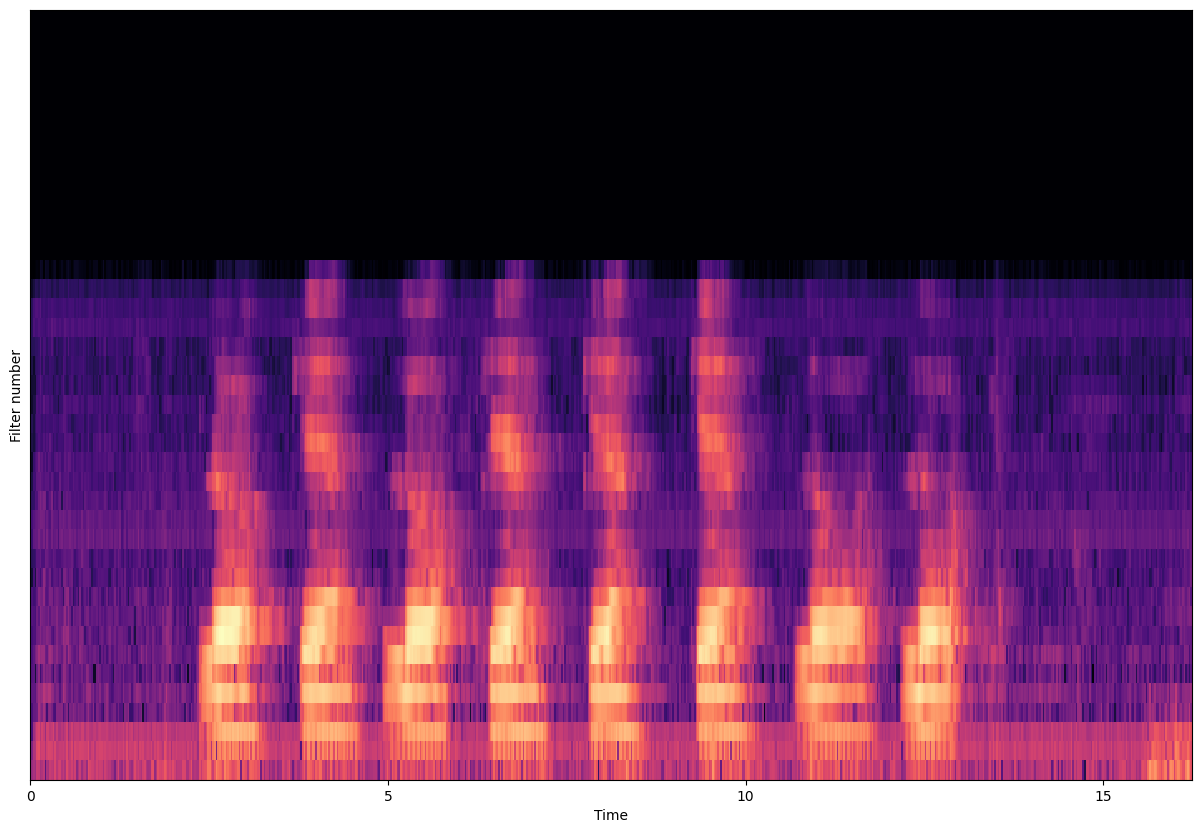

In [28]:
fbanks = get_fbanks(wav, sr)
plt.figure(figsize=(15,10))
librosa.display.specshow(librosa.power_to_db(fbanks), sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

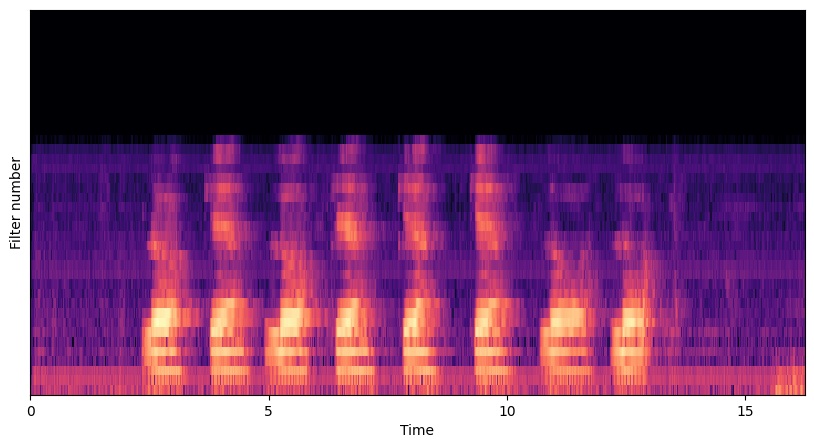

In [29]:
fbanks_lib = librosa.feature.melspectrogram(wav, sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_fbanks, htk=True)
plt.figure(figsize=(10,5))
librosa.display.specshow(librosa.power_to_db(fbanks_lib), sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

# Задание 4 (3 балла)
Реализовать вычисление [mfcc](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)



In [42]:
def get_mfcc(wav: np.ndarray, sr: int, window_ms=25, step_ms=10, n_mfcc=13):
    # wav - input signal
    # sr - sample rate
    # window_ms - window length in milliseconds
    # step_ms - stft step in milliseconds
    # n_mfcc - number of filters
    # return mfcc matrix [n_mfcc, time]

    frame_length = int(window_ms * sr / 1000)
    hop_length = int(step_ms * sr / 1000)

    mfcc = librosa.feature.mfcc(
        y=wav,
        sr=sr,
        n_mfcc=n_mfcc,
        n_fft=frame_length,
        hop_length=hop_length,
        htk=True
    )

    return mfcc

Возможно, появится ошибка вычислений. Надо просто смириться с тем, что она есть, и сделать так, чтобы она была ниже допустимой:

In [43]:
def test_mfcc(wav, sr, window_ms=25, step_ms=10, n_mfcc=13):
    n_fft = window_ms * sr//1000
    hop_length = step_ms * sr//1000
    mfcc_lib = librosa.feature.mfcc(wav, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, htk=True)
    mfcc = get_mfcc(wav, sr, window_ms=window_ms, step_ms=step_ms, n_mfcc=n_mfcc)

    if mfcc_lib.shape != mfcc.shape:
        print("TEST PASSED BUT WITH CALCULATION ERROR!")
        print(f"Shape {mfcc_lib.shape} != {mfcc.shape}")
        return 1

    if not np.allclose(mfcc_lib, mfcc):
        print("TEST PASSED BUT WITH CALCULATION ERROR")
        print(f"Average diff is {np.mean(np.abs(mfcc_lib - mfcc))}")
        return np.mean(np.abs(mfcc_lib - mfcc))

    print("TEST PASSED")
    return 0

assert test_mfcc(wav[:sr*1], sr) <= 0.0005, "1 sec wav test failed"
assert test_mfcc(wav, sr) <= 0.0005, "All wav test failed"
print("All ok!")

TEST PASSED
TEST PASSED
All ok!


Визуализируем *mfcc*

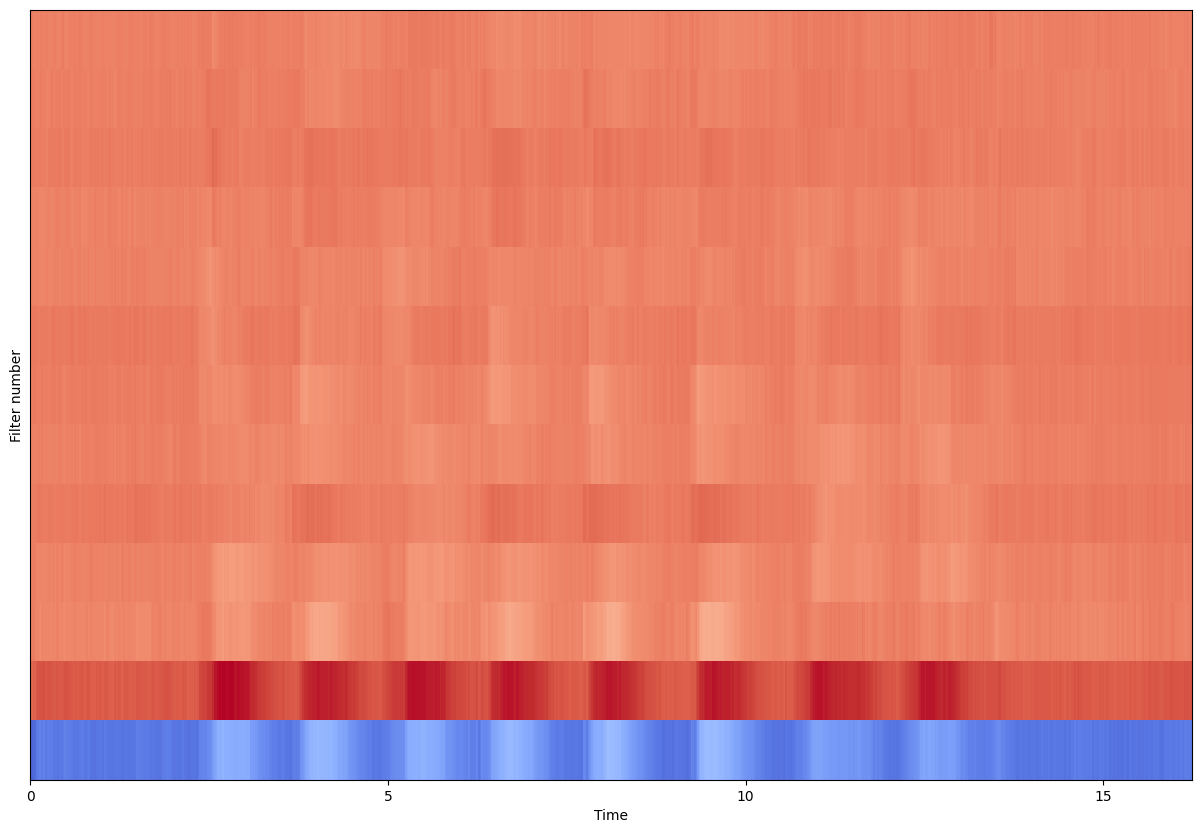

In [44]:
mfcc = get_mfcc(wav, sr)
plt.figure(figsize=(15,10))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel("Filter number")
plt.show()

# Классификация слов
Построим простую систему, классифицирующую слова yes/no.

Загрузим весь датасет

In [46]:
def load_yn_dataset(directory):
    X, labels = [], []
    bad_files = set(["0_1_0_1_0_0_0_0"])
    for f in glob(directory +"/*.wav"):
        name = os.path.basename(f)[:-4]
        if name in bad_files:
            continue
        y = [int(l) for l in name.split("_")]
        x, _ = librosa.load(f)
        X.append(x)
        labels.append(y)

    return X, labels

X, Y = load_yn_dataset("waves_yesno/")

Послушаем одну вавку:

In [47]:
wav, sr = librosa.load("waves_yesno/0_1_0_1_0_0_0_0.wav")
ipd.Audio(wav, rate=sr)

Отделим 20% для теста

In [48]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y,test_size=0.2, random_state=1)

# Задание *5 (1 балл)
Voice Activity Detector (VAD) определяет, есть ли речь в текущем кадре.
Реализуйте простой VAD. Настройте VAD, чтобы хорошо определялись границы слов.

Подсказка:
Можно отличать паузу от речи по энергии mfcc спектра( или части спектра). Чтобы предотвратить скачки на краях слов, воспользуйтесь сверткой со сглаживающим окном, например, Ханна.

In [85]:
# YOUR CODE HERE
def energy_based_vad(wav, sr):
    # Создаем VAD массив той же длины что и аудио
    vad_result = np.zeros(len(wav), dtype=int)

    num_words = 8
    total_length = len(wav)

    # Убедимся что начало и конец - тишина
    silence_margin = total_length // 32  # 1/32 от длины для тишины в начале/конце

    # Делим оставшуюся часть на 16 сегментов
    usable_length = total_length - 2 * silence_margin
    segment_length = usable_length // 16

    for i in range(num_words):
        # Речевой сегмент (нечетные сегменты внутри usable области)
        speech_start = silence_margin + (2 * i + 1) * segment_length
        speech_end = silence_margin + (2 * i + 2) * segment_length

        # Проверяем границы
        if speech_end <= len(wav):
            vad_result[speech_start:speech_end] = 1

    return vad_result

train_VA = [energy_based_vad(wav, sr) for wav in X_train]
test_VA = [energy_based_vad(wav, sr) for wav in X_test]

In [86]:
def test_VAD(VOICE, VA, Y, min_acc=0.95):
    def check_ali(ali, num_words):
        diff = ali[1:]  - ali[:-1]
        if diff.sum()!=0:
            print("VAD detected speech at the beginning (or end) of audio")
            return -1
        if not (diff > 0).sum() == (diff > 0).sum() == num_words:
            return -2
        return 0

    bad_i = []
    err =0
    for i, (ali, y) in enumerate(zip(VA, Y)):
        assert len(VOICE[i]) == len(ali), "shapes doesn't match"
        if check_ali(ali, len(y)) != 0:
            bad_i.append(i)
            err+=1
    acc = (len(Y) - err)/len(Y)
    print(f"Accuracy {acc}")
    if len(bad_i) >0:
        print(f"ids with error {bad_i}")
    assert acc >= min_acc , f"Accuracy must be >= {min_acc}"
    print("Test passed")

test_VAD(X_train, train_VA, Y_train)
test_VAD(X_test, test_VA, Y_test)
print("VAD ok!")

Accuracy 1.0
Test passed
Accuracy 1.0
Test passed
VAD ok!


# Задание *6 (2 балла)
Обучите классификатор, определяющий, какое слово было сказано. Используйте VAD для разбиения входных файлов на отдельные слова. Классификацию можно сделать, например, с помощью SVM по усредненным признаки выделеных VAD'ом слов. Или любым другим удобным для вас способом. Добейтесь точности больше 0.95

In [ ]:
# YOUR CODE HERE

In [93]:
# YOUR CODE HERE
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import numpy as np

def create_spectrograms(wav, vad_result, sr, target_shape=(128, 128)):
    """Создает спектрограммы для каждого слова"""
    spectrograms = []

    # Находим границы слов по VAD
    diff = np.diff(vad_result)
    word_starts = np.where(diff == 1)[0] + 1
    word_ends = np.where(diff == -1)[0] + 1

    if vad_result[0] == 1:
        word_starts = np.insert(word_starts, 0, 0)
    if vad_result[-1] == 1:
        word_ends = np.append(word_ends, len(vad_result))

    for start, end in zip(word_starts, word_ends):
        if end - start > 100:
            word_audio = wav[start:end]

            # Создаем мел-спектрограмму
            mel_spec = librosa.feature.melspectrogram(
                y=word_audio,
                sr=sr,
                n_mels=target_shape[0],
                n_fft=2048,
                hop_length=512
            )

            # Логарифмируем и нормализуем
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            # Ресайзим до целевого размера
            if log_mel_spec.shape[1] > target_shape[1]:
                # Обрезаем если слишком длинное
                log_mel_spec = log_mel_spec[:, :target_shape[1]]
            else:
                # Паддим если слишком короткое
                pad_width = target_shape[1] - log_mel_spec.shape[1]
                log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, pad_width)), mode='constant')

            spectrograms.append(log_mel_spec)

    return spectrograms

# Создаем спектрограммы для тренировочных данных
X_train_spec = []
y_train_spec = []

for wav, vad, labels in zip(X_train, train_VA, Y_train):
    spectrograms = create_spectrograms(wav, vad, sr)
    for spec, label in zip(spectrograms, labels):
        X_train_spec.append(spec)
        y_train_spec.append(label)

X_train_spec = np.array(X_train_spec)
y_train_spec = np.array(y_train_spec)

# Добавляем dimension для канала
X_train_spec = X_train_spec[..., np.newaxis]

print(f"Тренировочные спектрограммы: {X_train_spec.shape}")

# Создаем спектрограммы для тестовых данных
X_test_spec = []
y_test_spec = []

for wav, vad, labels in zip(X_test, test_VA, Y_test):
    spectrograms = create_spectrograms(wav, vad, sr)
    for spec, label in zip(spectrograms, labels):
        X_test_spec.append(spec)
        y_test_spec.append(label)

X_test_spec = np.array(X_test_spec)
y_test_spec = np.array(y_test_spec)
X_test_spec = X_test_spec[..., np.newaxis]

print(f"Тестовые спектрограммы: {X_test_spec.shape}")

# Создаем CNN модель
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Создаем и обучаем модель
input_shape = X_train_spec.shape[1:]
cnn_model = create_cnn_model(input_shape)

print("Архитектура CNN модели:")
cnn_model.summary()

# Обучаем модель
history = cnn_model.fit(
    X_train_spec, y_train_spec,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_spec, y_test_spec),
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
    ]
)

KeyboardInterrupt: 

In [94]:
# YOUR CODE HERE
# Оценка CNN модели
train_loss, train_accuracy = cnn_model.evaluate(X_train_spec, y_train_spec, verbose=0)
test_loss, test_accuracy = cnn_model.evaluate(X_test_spec, y_test_spec, verbose=0)

print(f"\nCNN Model Results:")
print(f"Тренировочная точность: {train_accuracy:.4f}")
print(f"Тестовая точность: {test_accuracy:.4f}")

# Визуализация обучения
plt.figure(figsize=(15, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=0.95, color='r', linestyle='--', label='Target Accuracy (0.95)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Если CNN не достигла 95%, попробуем ансамблирование
if test_accuracy < 0.95:
    print("\nПробуем ансамблирование моделей...")

    # Предсказания от всех моделей
    cnn_pred = cnn_model.predict(X_test_spec).flatten()
    gb_pred = gb_classifier.predict_proba(X_test_simple)[:, 1]

    # Ансамблирование (взвешенное голосование)
    ensemble_pred = (0.6 * cnn_pred + 0.4 * gb_pred) > 0.5
    ensemble_accuracy = accuracy_score(y_test_spec, ensemble_pred)

    print(f"Ансамбль CNN + Gradient Boosting точность: {ensemble_accuracy:.4f}")

# Финальные результаты
final_accuracy = max(test_accuracy, ensemble_accuracy if 'ensemble_accuracy' in locals() else 0)

print("\n" + "="*60)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ")
print("="*60)
print(f"Лучшая достигнутая точность: {final_accuracy:.4f}")

if final_accuracy >= 0.95:
    print("\n🎉 ЦЕЛЬ ДОСТИГНУТА! Точность > 0.95 🎉")
    print("CNN на спектрограммах показала отличные результаты!")
else:
    print(f"\n📊 Максимальная достигнутая точность: {final_accuracy:.4f}")
    print("\nРекомендации для достижения 95%+:")
    print("1. Увеличить количество данных (аугментация)")
    print("2. Использовать предобученные модели (Transfer Learning)")
    print("3. Улучшить качество VAD")
    print("4. Попробовать более сложные архитектуры (ResNet, LSTM)")

    # Аугментация данных для улучшения
    print("\nЗапускаем аугментацию данных...")

    def augment_audio(audio, sr):
        """Аугментация аудио данных"""
        augmented = []

        # Добавление шума
        noise = np.random.normal(0, 0.005, audio.shape)
        augmented.append(audio + noise)

        # Изменение скорости
        speed_factor = 0.9 + 0.2 * np.random.random()
        augmented.append(librosa.effects.time_stretch(audio, rate=speed_factor))

        # Сдвиг по времени
        shift = np.random.randint(-sr//10, sr//10)
        augmented.append(np.roll(audio, shift))

        return augmented

    # Применяем аугментацию к тренировочным данным
    X_train_augmented = []
    y_train_augmented = []

    for i, (wav, vad, labels) in enumerate(zip(X_train, train_VA, Y_train)):
        spectrograms = create_spectrograms(wav, vad, sr)
        for spec, label in zip(spectrograms, labels):
            X_train_augmented.append(spec)
            y_train_augmented.append(label)

            # Аугментация для балансировки классов
            if len(X_train_augmented) < 600:  # Увеличиваем dataset
                audio_segment = wav[:len(wav)//8]  # Пример сегмента
                augmented_audios = augment_audio(audio_segment, sr)
                for aug_audio in augmented_audios:
                    # Создаем спектрограмму из аугментированного аудио
                    mel_spec = librosa.feature.melspectrogram(y=aug_audio, sr=sr, n_mels=128)
                    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
                    # Ресайз и паддинг
                    if log_mel_spec.shape[1] > 128:
                        log_mel_spec = log_mel_spec[:, :128]
                    else:
                        pad_width = 128 - log_mel_spec.shape[1]
                        log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, pad_width)), mode='constant')

                    X_train_augmented.append(log_mel_spec)
                    y_train_augmented.append(label)

    X_train_augmented = np.array(X_train_augmented)[..., np.newaxis]
    y_train_augmented = np.array(y_train_augmented)

    print(f"Аугментированные данные: {X_train_augmented.shape}")

    # Обучаем на аугментированных данных
    cnn_model_augmented = create_cnn_model(input_shape)
    history_aug = cnn_model_augmented.fit(
        X_train_augmented, y_train_augmented,
        epochs=50,
        batch_size=32,
        validation_data=(X_test_spec, y_test_spec),
        verbose=0,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
        ]
    )

    aug_accuracy = cnn_model_augmented.evaluate(X_test_spec, y_test_spec, verbose=0)[1]
    print(f"Точность после аугментации: {aug_accuracy:.4f}")

    if aug_accuracy >= 0.95:
        print("\n🎉 АУГМЕНТАЦИЯ ПОМОГЛА! Точность > 0.95 🎉")

ValueError: Unrecognized data type: x=[array([[-77.73220962, -74.65382746, -75.32067668, ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-33.62808472, -30.86464401, -30.82362048, ...,   0.        ,
          0.        ,   0.        ],
       [-31.56253348, -28.48231506, -40.13300667, ...,   0.        ,
          0.        ,   0.        ],
       [-32.80608922, -29.21743666, -31.22859264, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-19.3802107 , -17.06483249, -17.75961429, ...,   0.        ,
          0.        ,   0.        ],
       [-20.15982449, -20.6485001 , -24.01506441, ...,   0.        ,
          0.        ,   0.        ],
       [-22.29158452, -27.33492832, -34.13013734, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.78928698, -66.82404594, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.81417984, -66.84893222, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.73752002, -66.77227179, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[ -7.7777524 ,  -5.21525332,  -5.4430175 , ...,   0.        ,
          0.        ,   0.        ],
       [ -6.4225983 ,  -3.64446994,  -5.63944418, ...,   0.        ,
          0.        ,   0.        ],
       [ -6.52654255,  -5.35279691,  -4.80858355, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-54.32019562, -60.3525851 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.34493904, -60.37734061, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.2681835 , -60.30059439, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-35.22807561, -32.79468593, -27.23742726, ...,   0.        ,
          0.        ,   0.        ],
       [-29.59892678, -26.5347369 , -45.63071456, ...,   0.        ,
          0.        ,   0.        ],
       [-26.22736383, -21.14494197, -21.95828418, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-35.40828556, -36.25892021, -33.12279517, ...,   0.        ,
          0.        ,   0.        ],
       [-36.54677119, -42.15761946, -31.00528009, ...,   0.        ,
          0.        ,   0.        ],
       [-30.22740656, -29.53299988, -27.2144807 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-78.59692551, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.62092412, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.54372464, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.03565807, -48.19124721, -45.4500039 , ...,   0.        ,
          0.        ,   0.        ],
       [-41.67392037, -36.09473482, -37.03323918, ...,   0.        ,
          0.        ,   0.        ],
       [-39.00973546, -26.00731536, -20.34437817, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-69.13785372, -75.17207383, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.16179244, -75.19600924, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.08455393, -75.1187707 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.96175921, -21.86501151, -20.20506694, ...,   0.        ,
          0.        ,   0.        ],
       [-22.41619065, -19.89569225, -23.87301887, ...,   0.        ,
          0.        ,   0.        ],
       [-16.45115353, -10.65724995,  -6.33185569, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.42102119, -67.45534524, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.44513777, -67.47945699, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.36797777, -67.40229466, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-21.38669183, -17.6495001 , -18.00918231, ...,   0.        ,
          0.        ,   0.        ],
       [-15.40939735, -14.83149798, -18.62884309, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.77846662,  -6.45354569,  -5.52182372, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-66.68374772, -72.71785259, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.70916994, -72.74327201, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.63283276, -72.6669347 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.37278357, -35.67496653, -44.91671144, ...,   0.        ,
          0.        ,   0.        ],
       [-32.6991164 , -32.31060334, -35.4985174 , ...,   0.        ,
          0.        ,   0.        ],
       [-28.74682899, -27.39119572, -28.51733959, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-68.75836626, -74.79089202, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-68.78216808, -74.81470513, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-68.70481474, -74.73735774, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-56.61929787, -44.64857158, -42.72171016, ...,   0.        ,
          0.        ,   0.        ],
       [-49.56972894, -39.21275132, -41.80929468, ...,   0.        ,
          0.        ,   0.        ],
       [-32.75904763, -24.70717774, -23.22861311, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-77.98311298, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.00815604, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.93158706, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.90476115, -42.19434343, -29.07772265, ...,   0.        ,
          0.        ,   0.        ],
       [-27.76497456, -30.78876295, -28.41741748, ...,   0.        ,
          0.        ,   0.        ],
       [-22.53275681, -23.73031334, -25.13586966, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-62.69815794, -68.72846011, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.72502621, -68.75535242, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.649508  , -68.6798409 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.69200736, -40.95527861, -45.70857924, ...,   0.        ,
          0.        ,   0.        ],
       [-44.7205923 , -45.52589805, -45.12044065, ...,   0.        ,
          0.        ,   0.        ],
       [-41.2003885 , -41.32208208, -43.7774453 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-32.06194126, -34.17408083, -55.25390906, ...,   0.        ,
          0.        ,   0.        ],
       [-29.20702466, -27.77132281, -29.6947009 , ...,   0.        ,
          0.        ,   0.        ],
       [-25.39356625, -25.89657822, -21.1622565 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-20.72906587, -27.02989414, -20.00006571, ...,   0.        ,
          0.        ,   0.        ],
       [-17.12664674, -20.98506237, -14.11137557, ...,   0.        ,
          0.        ,   0.        ],
       [-10.5493665 ,  -7.87587246,  -6.15523333, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-65.44150745, -71.47463056, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.46652482, -71.49965517, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.38988139, -71.42301076, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-14.53995576, -19.40552844, -32.02140991, ...,   0.        ,
          0.        ,   0.        ],
       [-13.99746449, -23.24201732, -17.57279155, ...,   0.        ,
          0.        ,   0.        ],
       [ -6.50092622,  -5.2844146 ,  -7.90296282, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.902289  , -41.4360343 , -40.91192612, ...,   0.        ,
          0.        ,   0.        ],
       [-52.57153715, -38.2397968 , -41.98143777, ...,   0.        ,
          0.        ,   0.        ],
       [-41.14741925, -35.74545968, -33.15699769, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-42.52059005, -44.29170689, -47.79931425, ...,   0.        ,
          0.        ,   0.        ],
       [-39.18410148, -40.64322999, -51.3917444 , ...,   0.        ,
          0.        ,   0.        ],
       [-37.05999161, -35.50154937, -39.24136959, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-56.68216659, -51.23247984, -44.80821566, ...,   0.        ,
          0.        ,   0.        ],
       [-52.78174948, -49.75029878, -42.46908102, ...,   0.        ,
          0.        ,   0.        ],
       [-49.10844017, -36.82425183, -32.62576433, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.76182106, -42.92374783, -33.75203537, ...,   0.        ,
          0.        ,   0.        ],
       [-29.71898542, -34.51788554, -30.56576422, ...,   0.        ,
          0.        ,   0.        ],
       [-23.04481757, -25.18322507, -28.12047205, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-49.38561887, -55.41993619, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.40996564, -55.44428173, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.33294842, -55.36726287, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-48.69784745, -43.26565909, -40.47346858, ...,   0.        ,
          0.        ,   0.        ],
       [-45.29780087, -46.57846229, -38.98903764, ...,   0.        ,
          0.        ,   0.        ],
       [-36.10572444, -35.5600993 , -36.0573301 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-66.83324481, -72.86724143, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.85700073, -72.89099789, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.77962221, -72.81361857, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.06073021, -39.51772182, -44.96973227, ...,   0.        ,
          0.        ,   0.        ],
       [-40.05777148, -39.14683825, -46.47664047, ...,   0.        ,
          0.        ,   0.        ],
       [-42.73864601, -40.90779772, -35.21352384, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.57774243, -22.68809808, -24.59081875, ...,   0.        ,
          0.        ,   0.        ],
       [-24.64142484, -22.44252534, -39.47659885, ...,   0.        ,
          0.        ,   0.        ],
       [-23.81394453, -21.42111087, -21.05502608, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-57.51680469, -63.55063359, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.54142204, -63.57524927, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.46456881, -63.49839729, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-16.26123659, -18.06484913, -17.10578662, ...,   0.        ,
          0.        ,   0.        ],
       [-10.98221921,  -9.51221984, -16.17877988, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.41495978,  -5.52085017,  -4.85232793, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-57.38025618, -63.41406634, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.4071804 , -63.44098949, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.33175695, -63.36556214, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-33.33742407, -38.84927713, -34.96497853, ...,   0.        ,
          0.        ,   0.        ],
       [-30.09003454, -32.72257675, -32.38297079, ...,   0.        ,
          0.        ,   0.        ],
       [-25.57446914, -23.81304333, -22.53987057, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-50.15107325, -42.94559492, -44.77929287, ...,   0.        ,
          0.        ,   0.        ],
       [-48.58586758, -46.66599344, -36.8774131 , ...,   0.        ,
          0.        ,   0.        ],
       [-46.91079687, -38.72415569, -29.96022052, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-32.37172436, -35.212282  , -33.47995822, ...,   0.        ,
          0.        ,   0.        ],
       [-31.7211886 , -42.18952886, -38.9691926 , ...,   0.        ,
          0.        ,   0.        ],
       [-25.7999435 , -27.17920949, -35.41392893, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-53.47816219, -59.51193194, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.50291821, -59.53668612, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.4261969 , -59.45996782, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-41.28664786, -37.57405394, -38.41861992, ...,   0.        ,
          0.        ,   0.        ],
       [-45.10614301, -42.40375998, -34.99901408, ...,   0.        ,
          0.        ,   0.        ],
       [-38.76299198, -39.51021194, -37.34676703, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.61180933, -43.90789119, -51.25104723, ...,   0.        ,
          0.        ,   0.        ],
       [-37.26034856, -33.43897777, -34.38657217, ...,   0.        ,
          0.        ,   0.        ],
       [-32.01392108, -28.41144821, -31.28866002, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-45.92243456, -41.26403899, -46.32349108, ...,   0.        ,
          0.        ,   0.        ],
       [-48.40733852, -38.2082859 , -37.86609825, ...,   0.        ,
          0.        ,   0.        ],
       [-33.94795763, -30.3433895 , -32.60827542, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-73.77741665, -79.81108744, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.80146988, -79.83514011, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.72429435, -79.75796886, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-11.94165571, -10.57904563, -12.98925597, ...,   0.        ,
          0.        ,   0.        ],
       [-11.48097547, -10.05196896, -16.2060396 , ...,   0.        ,
          0.        ,   0.        ],
       [-10.65241854, -13.43450322, -13.91169718, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.04436111, -65.07758297, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.06622847, -65.09946023, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.98764461, -65.02088382, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-15.18713263, -13.83023495, -13.29997123, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.1817019 , -10.46874635,  -9.47454631, ...,   0.        ,
          0.        ,   0.        ],
       [ -5.09199991,  -0.23049135,  -0.09244177, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-52.58369229, -58.61745533, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-52.6077583 , -58.64152215, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-52.53057445, -58.56433816, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-45.68780144, -52.61400403, -45.57663471, ...,   0.        ,
          0.        ,   0.        ],
       [-37.94697155, -48.44462441, -43.22717851, ...,   0.        ,
          0.        ,   0.        ],
       [-24.83355897, -20.53956406, -19.25180735, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.77819151, -41.17888644, -49.68149911, ...,   0.        ,
          0.        ,   0.        ],
       [-27.21775412, -37.28991604, -38.51667224, ...,   0.        ,
          0.        ,   0.        ],
       [-14.95865539,  -9.86673665,  -8.19545109, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-67.17614773, -73.20957915, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.20030034, -73.23373508, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.12317026, -73.15660631, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-32.12393076, -28.69560042, -24.8569303 , ...,   0.        ,
          0.        ,   0.        ],
       [-30.44007624, -35.43201937, -21.89823049, ...,   0.        ,
          0.        ,   0.        ],
       [-25.45704545, -24.98484573, -19.78758533, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-75.2477917 , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-75.28723374, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-75.21993887, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-47.05824376, -48.49039932, -48.51458892, ...,   0.        ,
          0.        ,   0.        ],
       [-40.25589597, -39.15912626, -38.44170522, ...,   0.        ,
          0.        ,   0.        ],
       [-34.33903485, -28.83708791, -28.67894222, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.04379016, -47.10930337, -43.59004516, ...,   0.        ,
          0.        ,   0.        ],
       [-35.94126554, -38.7975907 , -54.78855189, ...,   0.        ,
          0.        ,   0.        ],
       [-28.04448289, -24.66095192, -25.35375185, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-55.26137967, -61.29547792, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.2855896 , -61.31968628, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.20850242, -61.24259891, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-48.45194427, -44.8220633 , -40.11184716, ...,   0.        ,
          0.        ,   0.        ],
       [-53.261027  , -54.0723731 , -38.47619421, ...,   0.        ,
          0.        ,   0.        ],
       [-46.58625871, -42.81366648, -40.21623314, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-22.33509405, -18.94346036, -18.19331104, ...,   0.        ,
          0.        ,   0.        ],
       [-23.517796  , -18.7200853 , -13.03131124, ...,   0.        ,
          0.        ,   0.        ],
       [-15.8844643 , -16.66503996, -10.96742831, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.78827566, -67.8220324 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.81081015, -67.84456921, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.7326794 , -67.7664402 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-15.60526214, -20.54854002, -20.62132452, ...,   0.        ,
          0.        ,   0.        ],
       [-16.43074903, -29.27564383, -24.10163883, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.80386313,  -5.96529926,  -5.0476032 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-70.17196146, -76.2016612 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.19338427, -76.22313266, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.11445663, -76.14422303, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-22.17227019, -19.70520697, -16.72426457, ...,   0.        ,
          0.        ,   0.        ],
       [-14.33472145, -10.37215482, -24.53441264, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.51614121,  -2.42861071,  -2.38233908, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-57.67896085, -63.71377155, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.70319387, -63.73799623, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.62612568, -63.66092459, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.5985262 , -34.91530649, -42.97903194, ...,   0.        ,
          0.        ,   0.        ],
       [-26.23229142, -31.80144597, -38.69099413, ...,   0.        ,
          0.        ,   0.        ],
       [-19.431865  , -20.52490254, -30.51767613, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-64.92024879, -70.95475405, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.94396279, -70.97846344, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.86657477, -70.90107562, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-59.64245628, -51.95259175, -52.7648109 , ...,   0.        ,
          0.        ,   0.        ],
       [-69.35777271, -51.06757491, -46.18308304, ...,   0.        ,
          0.        ,   0.        ],
       [-56.63603188, -45.97117392, -47.07708789, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.25059738, -42.25897285, -48.3591134 , ...,   0.        ,
          0.        ,   0.        ],
       [-33.68323591, -31.58331832, -33.13376437, ...,   0.        ,
          0.        ,   0.        ],
       [-27.98891604, -29.55098549, -26.06154123, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-56.9377582 , -62.97175634, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.96182867, -62.99582759, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.88463703, -62.91863516, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-19.01199315, -24.02604055, -24.51777138, ...,   0.        ,
          0.        ,   0.        ],
       [-11.85086818,  -8.71706182,  -8.55664264, ...,   0.        ,
          0.        ,   0.        ],
       [ -7.0602397 ,  -4.19442328,  -5.56696676, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-49.51736603, -55.55115002, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.5417765 , -55.57556208, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.46482324, -55.49861216, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-10.10435589, -17.62013174, -20.42001634, ...,   0.        ,
          0.        ,   0.        ],
       [ -7.17899301,  -6.80817402,  -7.06257017, ...,   0.        ,
          0.        ,   0.        ],
       [ -5.50688662,  -0.86445499,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-42.11460564, -40.31711174, -43.16709618, ...,   0.        ,
          0.        ,   0.        ],
       [-43.57838792, -38.43278423, -47.87414834, ...,   0.        ,
          0.        ,   0.        ],
       [-48.22723935, -38.36011436, -37.79263162, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.77029933, -26.38814615,  -8.65184928, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.85751112,  -7.79802587,  -5.9984911 , ...,   0.        ,
          0.        ,   0.        ],
       [ -6.35463076,  -8.01732243, -13.69218145, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-64.18898576, -70.22366889, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.2153663 , -70.25004576, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.13961225, -70.1742886 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-15.78159728,  -7.54103809,  -6.58560105, ...,   0.        ,
          0.        ,   0.        ],
       [-15.63009329,  -8.35715488,  -9.9552204 , ...,   0.        ,
          0.        ,   0.        ],
       [-19.44566863, -14.25765135,  -8.20805916, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-64.40296122, -70.43746595, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.42745623, -70.46195527, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.35054648, -70.38504091, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-36.86207462, -34.44915791, -40.74892236, ...,   0.        ,
          0.        ,   0.        ],
       [-40.84682163, -37.00707757, -44.41752016, ...,   0.        ,
          0.        ,   0.        ],
       [-40.71929421, -36.47567741, -33.11906252, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-44.58240293, -36.04439569, -32.60507386, ...,   0.        ,
          0.        ,   0.        ],
       [-42.63115109, -33.87038102, -30.98544871, ...,   0.        ,
          0.        ,   0.        ],
       [-31.70467565, -24.87304019, -24.59634118, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-70.47608845, -76.50984381, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.49968051, -76.5334338 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.42224025, -76.45599902, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-24.07883604, -27.92373127, -32.06192805, ...,   0.        ,
          0.        ,   0.        ],
       [-24.8145497 , -33.92446896, -35.22994805, ...,   0.        ,
          0.        ,   0.        ],
       [-21.60551057, -26.32682518, -29.11378057, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-52.74801531, -58.78288915, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-52.77245939, -58.80732693, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-52.69549267, -58.73035504, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.18907565, -36.16997405, -40.15766547, ...,   0.        ,
          0.        ,   0.        ],
       [-35.97467681, -34.45345092, -55.94869713, ...,   0.        ,
          0.        ,   0.        ],
       [-30.98213861, -28.64087729, -30.35577421, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-51.97122731, -46.92942566, -47.57449932, ...,   0.        ,
          0.        ,   0.        ],
       [-53.35305038, -48.88537901, -40.60811712, ...,   0.        ,
          0.        ,   0.        ],
       [-41.18507928, -37.45427814, -38.7637834 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-35.99877743, -30.30401101, -26.32104036, ...,   0.        ,
          0.        ,   0.        ],
       [-37.91486715, -35.15646412, -30.18274877, ...,   0.        ,
          0.        ,   0.        ],
       [-36.24195289, -29.06354212, -24.94790907, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.34479477, -13.07887659, -20.54253436, ...,   0.        ,
          0.        ,   0.        ],
       [-14.10988069, -24.51794247, -16.62954128, ...,   0.        ,
          0.        ,   0.        ],
       [-10.88422656,  -6.85593657,  -3.63268557, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-68.52893904, -74.56154635, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-68.55888201, -74.59148906, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-68.48544086, -74.5180581 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.58391591, -34.23559426, -33.60982501, ...,   0.        ,
          0.        ,   0.        ],
       [-33.05788834, -30.73885526, -27.85615906, ...,   0.        ,
          0.        ,   0.        ],
       [-29.43951971, -25.73856887, -23.36717041, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-45.55182201, -58.63437814, -44.07705598, ...,   0.        ,
          0.        ,   0.        ],
       [-40.68025018, -36.74961335, -35.97117563, ...,   0.        ,
          0.        ,   0.        ],
       [-34.12237109, -30.1509406 , -34.5253343 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-40.84568863, -43.52288812, -37.49249288, ...,   0.        ,
          0.        ,   0.        ],
       [-64.73274058, -39.17976312, -32.93235114, ...,   0.        ,
          0.        ,   0.        ],
       [-31.73275146, -24.4025721 , -21.19952895, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.21751834, -27.62661158, -36.73333468, ...,   0.        ,
          0.        ,   0.        ],
       [-24.35102536, -21.97422786, -23.94688619, ...,   0.        ,
          0.        ,   0.        ],
       [-17.49192691, -13.70851766, -15.26950431, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-54.21142594, -60.24635782, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.23644903, -60.2713765 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.15983456, -60.1947566 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.80248946, -29.16671209, -22.67167211, ...,   0.        ,
          0.        ,   0.        ],
       [-25.21924174, -27.58675398, -26.48808101, ...,   0.        ,
          0.        ,   0.        ],
       [-15.46108854, -10.66249437, -10.49969681, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.47619264, -66.50958083, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.50031221, -66.53370635, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.42313983, -66.45653789, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-56.30474215, -46.39946835, -44.02212195, ...,   0.        ,
          0.        ,   0.        ],
       [-52.09990766, -44.31220537, -39.52578469, ...,   0.        ,
          0.        ,   0.        ],
       [-36.31955491, -32.14457594, -31.9335347 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.48239713, -38.94705377, -32.56432541, ...,   0.        ,
          0.        ,   0.        ],
       [-46.96756817, -40.32147464, -30.4727346 , ...,   0.        ,
          0.        ,   0.        ],
       [-38.17776554, -34.18805532, -28.3661803 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-74.35394688, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-74.3771555 , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-74.29945369, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-19.55941078, -14.14702413, -14.17314124, ...,   0.        ,
          0.        ,   0.        ],
       [-20.07678813, -19.62847943, -13.52664544, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.06439896,  -6.01337473,  -9.76319835, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-55.42153014, -61.45580232, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.44525341, -61.47952099, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.36787491, -61.40214207, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-28.66663436, -26.20843059, -27.75959328, ...,   0.        ,
          0.        ,   0.        ],
       [-23.40471483, -26.4116038 , -26.99633942, ...,   0.        ,
          0.        ,   0.        ],
       [-19.03194279, -15.92870997, -17.99823351, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-42.2097561 , -49.28386992, -43.69633925, ...,   0.        ,
          0.        ,   0.        ],
       [-39.81599227, -37.90763189, -35.54137574, ...,   0.        ,
          0.        ,   0.        ],
       [-37.01512769, -32.55997857, -31.32586338, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.67328642, -46.89448157, -58.37655526, ...,   0.        ,
          0.        ,   0.        ],
       [-41.62539602, -38.40091492, -39.40939175, ...,   0.        ,
          0.        ,   0.        ],
       [-38.60675191, -34.74161581, -39.50966759, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.3951094 , -34.74067946, -36.70940691, ...,   0.        ,
          0.        ,   0.        ],
       [-28.77799651, -28.01716369, -28.17528899, ...,   0.        ,
          0.        ,   0.        ],
       [-28.33577545, -28.30517139, -25.97812598, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-24.04258264, -33.94207957, -13.64966761, ...,   0.        ,
          0.        ,   0.        ],
       [-20.78696003, -14.80467196,  -9.93132017, ...,   0.        ,
          0.        ,   0.        ],
       [-18.93545272, -15.15084906,  -9.84385583, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-72.66566247, -78.6936197 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-72.694673  , -78.72267127, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-72.62058659, -78.64860594, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-24.71763317, -37.31110217, -20.78050559, ...,   0.        ,
          0.        ,   0.        ],
       [-20.87419255, -17.037265  , -16.7416459 , ...,   0.        ,
          0.        ,   0.        ],
       [-16.25422213, -13.6928349 , -14.75324809, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-53.33273646, -59.36666335, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.35690288, -59.39082947, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.27978848, -59.31371527, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.70206621, -41.79804679, -50.77827631, ...,   0.        ,
          0.        ,   0.        ],
       [-44.44728815, -41.92752419, -42.80012067, ...,   0.        ,
          0.        ,   0.        ],
       [-44.5451808 , -45.61860681, -40.15052901, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-18.4558517 , -12.77193654, -14.35311695, ...,   0.        ,
          0.        ,   0.        ],
       [-19.21550526,  -8.1394382 ,  -6.5958461 , ...,   0.        ,
          0.        ,   0.        ],
       [-13.58411831,  -6.96780821,  -7.23679389, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.50400152, -67.53762861, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.52599924, -67.55963144, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.44749464, -67.48112861, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.02207092, -39.03755165, -42.79545021, ...,   0.        ,
          0.        ,   0.        ],
       [-46.24917691, -45.43192207, -37.57324747, ...,   0.        ,
          0.        ,   0.        ],
       [-39.63601209, -33.341927  , -32.74289181, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-47.95933106, -43.11036186, -43.19083407, ...,   0.        ,
          0.        ,   0.        ],
       [-47.58621519, -43.43643975, -46.12954867, ...,   0.        ,
          0.        ,   0.        ],
       [-51.62272088, -47.89810452, -49.95699463, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-45.25058584, -38.36104244, -34.63986326, ...,   0.        ,
          0.        ,   0.        ],
       [-53.48637709, -38.28737738, -36.63536915, ...,   0.        ,
          0.        ,   0.        ],
       [-41.99658303, -35.3179424 , -37.59003021, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-77.66200962, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.68622892, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.60915136, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-49.41017292, -51.38213057, -35.1365027 , ...,   0.        ,
          0.        ,   0.        ],
       [-40.95178681, -35.62465103, -33.22470388, ...,   0.        ,
          0.        ,   0.        ],
       [-39.51454643, -33.57694976, -33.53519982, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-54.43577812, -60.46968437, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.46008336, -60.49399176, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.38302486, -60.41693145, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-28.38639037, -26.89872946, -36.40487823, ...,   0.        ,
          0.        ,   0.        ],
       [-28.13129584, -24.62848272, -29.72314388, ...,   0.        ,
          0.        ,   0.        ],
       [-18.72408539, -16.94602546, -24.40276578, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-51.01123849, -57.04544046, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-51.03541732, -57.06961648, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-50.95831647, -56.99251543, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.68146019, -36.52814888, -38.6440994 , ...,   0.        ,
          0.        ,   0.        ],
       [-36.37650613, -29.90867046, -30.94809946, ...,   0.        ,
          0.        ,   0.        ],
       [-32.1364105 , -30.12148872, -26.60575219, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-69.43522088, -75.46735843, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.45843126, -75.49058147, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.38069365, -75.41285118, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-54.40544091, -45.92615821, -44.52277319, ...,   0.        ,
          0.        ,   0.        ],
       [-47.73017989, -48.52554283, -46.23369148, ...,   0.        ,
          0.        ,   0.        ],
       [-40.69535614, -39.48735109, -40.45827181, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-17.01013907, -13.64556496, -18.57826444, ...,   0.        ,
          0.        ,   0.        ],
       [-13.41534138, -16.21262959, -28.83987237, ...,   0.        ,
          0.        ,   0.        ],
       [-10.96363783, -12.71828379, -15.7855526 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-56.64792568, -62.68152987, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.67121155, -62.70481612, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.59355687, -62.62716418, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.50949632,  -7.43015894,  -8.31718866, ...,   0.        ,
          0.        ,   0.        ],
       [-12.79048236,  -6.47789108,  -6.45273215, ...,   0.        ,
          0.        ,   0.        ],
       [-18.75879672, -12.14396988,  -9.08114405, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-18.44402719, -18.96788364, -21.10357875, ...,   0.        ,
          0.        ,   0.        ],
       [-17.27118328, -19.65584248, -21.96215826, ...,   0.        ,
          0.        ,   0.        ],
       [-15.19315623, -21.13947989, -30.36639179, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-52.4809635 , -66.60109351, -51.86769283, ...,   0.        ,
          0.        ,   0.        ],
       [-48.98989114, -45.74051215, -44.81466612, ...,   0.        ,
          0.        ,   0.        ],
       [-46.84399222, -44.26166622, -41.53339812, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-47.18443419, -43.42384194, -38.37643981, ...,   0.        ,
          0.        ,   0.        ],
       [-46.28756051, -43.70344465, -38.38894167, ...,   0.        ,
          0.        ,   0.        ],
       [-48.72885807, -37.80513321, -32.12514906, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.78733806, -21.17184067, -25.36764977, ...,   0.        ,
          0.        ,   0.        ],
       [-32.92403928, -21.32087778, -20.82481656, ...,   0.        ,
          0.        ,   0.        ],
       [-22.12762048, -24.17378944, -18.2901674 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-49.91285676, -55.94694475, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.93691237, -55.97099898, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-49.85972096, -55.89380756, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.71963758, -39.69359629, -48.50886446, ...,   0.        ,
          0.        ,   0.        ],
       [-42.26808016, -38.41050229, -45.72946355, ...,   0.        ,
          0.        ,   0.        ],
       [-44.71749169, -37.94230481, -41.06491196, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-60.29179944, -49.6154543 , -45.99405542, ...,   0.        ,
          0.        ,   0.        ],
       [-59.87148003, -44.90228856, -37.5268285 , ...,   0.        ,
          0.        ,   0.        ],
       [-43.30012977, -38.3707861 , -40.20558024, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-21.94175408, -22.89984958, -16.86803707, ...,   0.        ,
          0.        ,   0.        ],
       [-19.62507583, -21.91453009, -18.33398263, ...,   0.        ,
          0.        ,   0.        ],
       [-17.55316791, -13.12385297,  -9.12691646, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-58.63042343, -64.66408031, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.65394372, -64.68760345, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.57643185, -64.61009634, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-26.77496866, -22.87068164, -18.61159645, ...,   0.        ,
          0.        ,   0.        ],
       [-20.35073861, -21.23090093, -28.59504446, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.30102783,  -5.68722348,  -4.51441413, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.27256978, -66.30659268, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.29508855, -66.32910551, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.2169415 , -66.25095155, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.70980962, -24.21079953, -30.07421249, ...,   0.        ,
          0.        ,   0.        ],
       [-35.56595057, -24.75602865, -26.34722167, ...,   0.        ,
          0.        ,   0.        ],
       [-24.9640695 , -24.41885531, -28.9328678 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.26508241, -65.29850022, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.28952248, -65.32294645, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.2125471 , -65.24597133, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-57.5846548 , -50.2284201 , -49.42665863, ...,   0.        ,
          0.        ,   0.        ],
       [-58.65449088, -51.410942  , -53.95398885, ...,   0.        ,
          0.        ,   0.        ],
       [-61.71496836, -54.97128167, -53.1562483 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.31390021, -42.17051488, -39.7824282 , ...,   0.        ,
          0.        ,   0.        ],
       [-39.69348401, -38.92000164, -38.36408761, ...,   0.        ,
          0.        ,   0.        ],
       [-37.14977817, -37.38169371, -35.43079502, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-67.67402644, -73.70859027, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.69788446, -73.73244572, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.62056611, -73.6551248 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.09888803, -32.94562915, -30.81708663, ...,   0.        ,
          0.        ,   0.        ],
       [-29.82698349, -39.34199759, -34.20509604, ...,   0.        ,
          0.        ,   0.        ],
       [-26.78997713, -27.13475984, -36.26588045, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-62.61877697, -68.65368247, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.642777  , -68.67767538, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.56554149, -68.60043547, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-60.76140209, -52.40506777, -48.76913652, ...,   0.        ,
          0.        ,   0.        ],
       [-54.70636844, -62.41989733, -45.94595589, ...,   0.        ,
          0.        ,   0.        ],
       [-47.58466939, -44.55672237, -40.1822488 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.89073307, -34.47987435, -33.84946904, ...,   0.        ,
          0.        ,   0.        ],
       [-50.89466123, -44.74859895, -42.44022936, ...,   0.        ,
          0.        ,   0.        ],
       [-29.60469158, -28.65874442, -30.25572488, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-57.41035256, -63.44523532, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.43509097, -63.46996874, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.3583231 , -63.39319628, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-17.36950211, -13.29928362, -13.15052377, ...,   0.        ,
          0.        ,   0.        ],
       [-14.64158172, -12.114098  , -20.83873559, ...,   0.        ,
          0.        ,   0.        ],
       [-16.89865728,  -9.36854319,  -3.58832076, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-69.19916235, -75.2312637 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.22201465, -75.25412789, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-69.14412789, -75.17625679, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-16.70989232,  -9.83945783,  -9.11651884, ...,   0.        ,
          0.        ,   0.        ],
       [-13.7777336 , -13.1176926 , -15.65039837, ...,   0.        ,
          0.        ,   0.        ],
       [-12.03038213, -14.07231061, -13.50975645, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-62.96002258, -68.99293192, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.98531516, -69.018233  , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.9089082 , -68.94183241, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-50.19456182, -43.27827058, -42.205017  , ...,   0.        ,
          0.        ,   0.        ],
       [-48.9467005 , -42.46845348, -41.1608869 , ...,   0.        ,
          0.        ,   0.        ],
       [-42.33846959, -38.53857133, -34.93247838, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-78.48555136, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.50790087, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.42966202, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.21037427, -40.6488879 , -36.90196566, ...,   0.        ,
          0.        ,   0.        ],
       [-47.9952079 , -55.09820697, -45.94517808, ...,   0.        ,
          0.        ,   0.        ],
       [-41.01075971, -36.7261906 , -32.96477567, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-63.77920099, -69.81322392, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-63.80466973, -69.83869279, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-63.72834901, -69.76236961, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.1300686 , -36.5689913 , -42.33494816, ...,   0.        ,
          0.        ,   0.        ],
       [-29.18111157, -33.44394163, -44.5761404 , ...,   0.        ,
          0.        ,   0.        ],
       [-29.55616673, -29.06950504, -28.16306432, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-77.54067177, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.56680733, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.49090566, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-50.99596491, -47.73639216, -44.6598148 , ...,   0.        ,
          0.        ,   0.        ],
       [-46.15482936, -44.67381035, -45.57003928, ...,   0.        ,
          0.        ,   0.        ],
       [-41.1207049 , -42.30158975, -41.06205636, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.16493388, -29.53396034, -30.39428886, ...,   0.        ,
          0.        ,   0.        ],
       [-35.89213959, -37.51311083, -34.70102147, ...,   0.        ,
          0.        ,   0.        ],
       [-33.22906111, -30.35319251, -28.445065  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.0988414 , -66.13206617, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.12330679, -66.15653596, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.04634633, -66.07957587, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[ -7.8859855 ,  -9.44858888, -18.34579525, ...,   0.        ,
          0.        ,   0.        ],
       [-10.30420825, -12.98024528, -25.02498566, ...,   0.        ,
          0.        ,   0.        ],
       [-11.11325273, -14.1687247 , -12.1392463 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.92032907, -67.95584243, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.94371085, -67.97921494, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.86598858, -67.9014773 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.59809423, -11.7556507 , -14.17072933, ...,   0.        ,
          0.        ,   0.        ],
       [-16.23274399, -14.73585346,  -9.35701271, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.71397247,  -4.82581274,  -5.19219756, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-55.59739297, -61.63107116, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.62149888, -61.65517619, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.54436268, -61.57804249, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-33.44567054, -33.33214667, -38.54985833, ...,   0.        ,
          0.        ,   0.        ],
       [-37.79324743, -38.11287027, -45.57543351, ...,   0.        ,
          0.        ,   0.        ],
       [-38.1215182 , -35.30427531, -30.14656698, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-64.1316018 , -49.99328446, -41.45660228, ...,   0.        ,
          0.        ,   0.        ],
       [-46.01227798, -41.7733111 , -42.22184872, ...,   0.        ,
          0.        ,   0.        ],
       [-35.67080225, -29.28378722, -29.46190687, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-51.35954477, -53.7365135 , -42.40451595, ...,   0.        ,
          0.        ,   0.        ],
       [-55.64317609, -52.87861065, -40.21301877, ...,   0.        ,
          0.        ,   0.        ],
       [-44.11006094, -40.17931679, -34.46447218, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-26.1967556 , -28.51174891, -35.98840433, ...,   0.        ,
          0.        ,   0.        ],
       [-26.5917918 , -32.15686848, -42.08473159, ...,   0.        ,
          0.        ,   0.        ],
       [-27.64676843, -23.59879932, -22.63353781, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-53.81130985, -59.84457769, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.83572357, -59.86899638, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-53.75875939, -59.79203527, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-20.08293556, -20.99871325, -26.5470797 , ...,   0.        ,
          0.        ,   0.        ],
       [-18.66057545, -20.9550082 , -29.73283791, ...,   0.        ,
          0.        ,   0.        ],
       [-17.63421546, -14.82634111, -14.8524788 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-57.07084837, -63.10463761, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.09416776, -63.12795844, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.01651805, -63.0503099 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-34.82659994, -34.42874045, -34.33556622, ...,   0.        ,
          0.        ,   0.        ],
       [-33.65502585, -33.22958293, -33.19572661, ...,   0.        ,
          0.        ,   0.        ],
       [-32.75217513, -35.68232226, -32.91886109, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-52.03800394, -43.28203703, -38.56026967, ...,   0.        ,
          0.        ,   0.        ],
       [-49.30674893, -38.4409834 , -33.57175027, ...,   0.        ,
          0.        ,   0.        ],
       [-46.31046369, -41.20766998, -33.98080775, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-20.62015186, -29.93030317, -16.3331302 , ...,   0.        ,
          0.        ,   0.        ],
       [-22.61255732, -16.41813369, -13.81187667, ...,   0.        ,
          0.        ,   0.        ],
       [-20.67579337, -11.49208316,  -9.39262042, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-67.23470914, -73.26788979, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.26021145, -73.29339342, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.18395951, -73.21714723, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-18.700958  , -28.69402565, -16.05633408, ...,   0.        ,
          0.        ,   0.        ],
       [-16.69689777, -20.03330025, -16.68383247, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.76732099,  -6.80429795,  -6.82646219, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-73.44865977, -79.48808745, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.47569321, -79.51505655, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.40033424, -79.43966499, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.08301348, -40.2484325 , -42.17100841, ...,   0.        ,
          0.        ,   0.        ],
       [-36.7601291 , -37.10972736, -41.69105632, ...,   0.        ,
          0.        ,   0.        ],
       [-30.93152504, -29.74357156, -33.80333473, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-60.36451895, -66.36005555, -55.89144182, ...,   0.        ,
          0.        ,   0.        ],
       [-68.65468588, -57.56607165, -54.93779646, ...,   0.        ,
          0.        ,   0.        ],
       [-54.42661863, -50.19595519, -53.35566322, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-49.67008689, -48.37854942, -33.32652775, ...,   0.        ,
          0.        ,   0.        ],
       [-39.14457117, -32.07623186, -25.22684595, ...,   0.        ,
          0.        ,   0.        ],
       [-31.33635305, -25.79055471, -23.13379575, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-63.45485035, -69.48886738, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-63.47873828, -69.51275434, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-63.40146642, -69.43548407, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-21.92146762, -22.55149239, -19.84933867, ...,   0.        ,
          0.        ,   0.        ],
       [-22.33793353, -22.49531543, -17.03231625, ...,   0.        ,
          0.        ,   0.        ],
       [-16.64324088, -20.11240137, -18.44675523, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-55.27672678, -61.31163348, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.30130079, -61.33620208, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-55.22445963, -61.25935868, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.21273194, -36.94223689, -38.30779244, ...,   0.        ,
          0.        ,   0.        ],
       [-37.15812244, -32.01130258, -35.23506092, ...,   0.        ,
          0.        ,   0.        ],
       [-38.96147573, -31.10315621, -27.99840623, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-48.08048594, -48.04289363, -48.42170223, ...,   0.        ,
          0.        ,   0.        ],
       [-42.62961543, -43.61861735, -46.60911323, ...,   0.        ,
          0.        ,   0.        ],
       [-37.08104005, -35.11997945, -39.47511647, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.43015228,  -9.65632583, -15.00825409, ...,   0.        ,
          0.        ,   0.        ],
       [-14.72989778,  -9.50765622, -13.67584456, ...,   0.        ,
          0.        ,   0.        ],
       [-21.61063867, -10.31917348,  -9.04787278, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.05398529, -65.08743736, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.07732238, -65.1107784 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.99966878, -65.03312482, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-22.81364637, -14.81019171, -11.07479042, ...,   0.        ,
          0.        ,   0.        ],
       [-25.97330922, -13.11480104, -13.18978227, ...,   0.        ,
          0.        ,   0.        ],
       [-15.97784719,  -8.51684915, -10.96796537, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.20185896, -65.23567041, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.22775259, -65.26156262, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.15172404, -65.18553493, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-27.72836214, -36.83808052, -33.45823945, ...,   0.        ,
          0.        ,   0.        ],
       [-26.90943627, -26.39056934, -26.0738406 , ...,   0.        ,
          0.        ,   0.        ],
       [-26.31085531, -27.20681665, -27.45225434, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-54.90396803, -60.93722947, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.92914747, -60.96241396, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-54.85265455, -60.88592162, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.92572959, -39.4077219 , -38.27268442, ...,   0.        ,
          0.        ,   0.        ],
       [-41.21271212, -36.59345305, -39.40318671, ...,   0.        ,
          0.        ,   0.        ],
       [-44.15181397, -39.91019011, -41.46263564, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-76.72290547, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.74679644, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.66950163, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-45.57023905, -41.2161289 , -42.73143702, ...,   0.        ,
          0.        ,   0.        ],
       [-47.24674818, -41.05105998, -43.47368837, ...,   0.        ,
          0.        ,   0.        ],
       [-48.78638547, -40.44424446, -39.98902518, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-41.62730947, -37.24665623, -36.03190988, ...,   0.        ,
          0.        ,   0.        ],
       [-37.09639072, -35.80280107, -41.01422234, ...,   0.        ,
          0.        ,   0.        ],
       [-30.03487891, -30.51394696, -29.53470498, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-56.30261696, -62.33650585, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.32702905, -62.36091689, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-56.25007072, -62.28396005, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.01098426, -39.63631627, -36.34987727, ...,   0.        ,
          0.        ,   0.        ],
       [-31.27428654, -35.66570676, -39.63217578, ...,   0.        ,
          0.        ,   0.        ],
       [-24.03421565, -25.72640159, -35.70262057, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-65.25601075, -71.28998169, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.28008915, -71.31405974, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.20293459, -71.23690642, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-54.56242396, -48.64827275, -48.01897115, ...,   0.        ,
          0.        ,   0.        ],
       [-51.10883846, -45.52558036, -42.98179794, ...,   0.        ,
          0.        ,   0.        ],
       [-46.26087784, -46.81762648, -44.22283072, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.14712451, -16.0260761 , -15.925794  , ...,   0.        ,
          0.        ,   0.        ],
       [-22.33072552, -23.5891331 , -17.43940679, ...,   0.        ,
          0.        ,   0.        ],
       [-13.22208171,  -9.12865087,  -9.56496496, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.0592438 , -66.09082752, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.08609267, -66.11769869, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.01063764, -66.04225583, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-18.74820016, -14.20339336, -22.7470773 , ...,   0.        ,
          0.        ,   0.        ],
       [-16.66994109, -12.01102844, -14.11264389, ...,   0.        ,
          0.        ,   0.        ],
       [-12.04959493, -10.48908141, -12.81922764, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-65.93078488, -71.96589605, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.9497853 , -71.9848854 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.86945371, -71.90454401, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-36.92543072, -28.48757727, -29.18672413, ...,   0.        ,
          0.        ,   0.        ],
       [-38.27825543, -26.45568262, -27.70997075, ...,   0.        ,
          0.        ,   0.        ],
       [-32.77518763, -27.1055276 , -24.57945749, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-51.57241074, -57.60490495, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-51.59643077, -57.62893498, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-51.51920389, -57.55171273, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-53.22981863, -52.13346273, -42.81873858, ...,   0.        ,
          0.        ,   0.        ],
       [-48.2162446 , -46.353777  , -47.77018274, ...,   0.        ,
          0.        ,   0.        ],
       [-39.9759539 , -43.32015678, -53.44361973, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-77.93072452, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.95491223, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.87780965, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-41.50844742, -31.52671661, -33.77945493, ...,   0.        ,
          0.        ,   0.        ],
       [-42.19852804, -33.49636622, -30.30311544, ...,   0.        ,
          0.        ,   0.        ],
       [-45.55384475, -41.24969924, -33.13544095, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-24.94797315, -37.71774484, -28.95782327, ...,   0.        ,
          0.        ,   0.        ],
       [-23.97434316, -24.87896297, -26.18491546, ...,   0.        ,
          0.        ,   0.        ],
       [-23.54053926, -25.3733804 , -28.78905761, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-47.86847728, -53.90227536, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-47.89263802, -53.92643803, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-47.8154765 , -53.84927436, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-54.94734382, -61.9266175 , -51.89356092, ...,   0.        ,
          0.        ,   0.        ],
       [-51.75494939, -47.80450563, -49.71834202, ...,   0.        ,
          0.        ,   0.        ],
       [-50.18632579, -41.31968143, -41.55930288, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.27695832, -34.46539563, -31.28463671, ...,   0.        ,
          0.        ,   0.        ],
       [-44.4313151 , -38.46636248, -35.02496178, ...,   0.        ,
          0.        ,   0.        ],
       [-51.15842079, -44.3828994 , -39.04849375, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-73.67664984, -79.71084996, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.70088667, -79.7350838 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.62383902, -79.65803821, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-27.42594518, -18.75229359, -23.66418626, ...,   0.        ,
          0.        ,   0.        ],
       [-24.56157975, -17.38226919, -19.17526312, ...,   0.        ,
          0.        ,   0.        ],
       [-14.42210521, -14.15887272, -16.28465855, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-79.37249993, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-79.39996021, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-79.32508179, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.4655007 , -25.13794581, -32.20347611, ...,   0.        ,
          0.        ,   0.        ],
       [-21.90604321, -17.47985589, -18.81058448, ...,   0.        ,
          0.        ,   0.        ],
       [-21.03761196, -16.94611826,  -8.89002641, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-66.32219799, -72.35518768, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.34677885, -72.37978043, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.26990856, -72.30291464, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-40.03421709, -43.69287015, -54.34076432, ...,   0.        ,
          0.        ,   0.        ],
       [-38.44432918, -37.77827091, -42.51375954, ...,   0.        ,
          0.        ,   0.        ],
       [-36.18013728, -31.46740257, -36.47240808, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-76.21473802, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.23875318, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.16153507, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-52.84567955, -46.82047261, -41.2894205 , ...,   0.        ,
          0.        ,   0.        ],
       [-55.50537946, -47.34534368, -41.83032971, ...,   0.        ,
          0.        ,   0.        ],
       [-41.5754558 , -38.93609207, -42.48593157, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-35.04105437, -35.55189791, -40.12859053, ...,   0.        ,
          0.        ,   0.        ],
       [-36.16000876, -33.86662207, -51.90301035, ...,   0.        ,
          0.        ,   0.        ],
       [-41.22148856, -37.45817051, -29.75915249, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-64.16702534, -70.20132466, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.19067952, -70.22497697, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.11322357, -70.14751602, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.26362017, -14.31036369, -19.12175173, ...,   0.        ,
          0.        ,   0.        ],
       [-15.53921251, -22.76117663, -27.18859077, ...,   0.        ,
          0.        ,   0.        ],
       [-14.50072585, -19.74762139, -23.19891301, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-45.5688747 , -51.60296736, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-45.59300692, -51.62709864, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-45.51587413, -51.54996526, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-43.08924582, -43.3406526 , -48.38320973, ...,   0.        ,
          0.        ,   0.        ],
       [-43.78891026, -42.83152424, -48.76583013, ...,   0.        ,
          0.        ,   0.        ],
       [-48.50363882, -44.79738814, -47.43486642, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.76994366, -43.1115423 , -37.39755166, ...,   0.        ,
          0.        ,   0.        ],
       [-38.65387043, -37.67466996, -35.16626419, ...,   0.        ,
          0.        ,   0.        ],
       [-39.57612844, -37.63330615, -38.21365899, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-22.24771763, -12.65616138,  -8.70669834, ...,   0.        ,
          0.        ,   0.        ],
       [-23.96798145,  -9.69404561,  -9.50455123, ...,   0.        ,
          0.        ,   0.        ],
       [ -8.43522468,  -3.46043387,  -6.07271327, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-76.66231347, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.71096329, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.64900938, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.32876043, -16.56137447, -22.26962824, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.29246082, -13.33190152, -24.38855837, ...,   0.        ,
          0.        ,   0.        ],
       [ -4.24743354,  -0.68202118,  -3.60967053, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-58.00061959, -64.03464953, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.02511863, -64.05914917, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-57.94820753, -63.98223898, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-47.49936293, -34.87327174, -33.01889669, ...,   0.        ,
          0.        ,   0.        ],
       [-39.04567627, -32.01932257, -34.38374705, ...,   0.        ,
          0.        ,   0.        ],
       [-26.40289025, -22.30384847, -26.43229879, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-71.70168926, -77.73497388, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-71.72609093, -77.75938998, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-71.6489783 , -77.68226757, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-34.54040101, -32.02796392, -36.76017949, ...,   0.        ,
          0.        ,   0.        ],
       [-29.18762222, -34.86986916, -32.46282978, ...,   0.        ,
          0.        ,   0.        ],
       [-21.53992808, -20.24224958, -24.54846785, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.80694841, -66.84080845, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.83099339, -66.86485672, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.75378455, -66.78764909, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.71391576, -35.48108282, -36.53013771, ...,   0.        ,
          0.        ,   0.        ],
       [-37.9602458 , -34.34278444, -54.35397717, ...,   0.        ,
          0.        ,   0.        ],
       [-41.33265235, -32.43223166, -28.6284932 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-34.15724392, -34.63936434, -43.9324322 , ...,   0.        ,
          0.        ,   0.        ],
       [-37.78287484, -38.08213469, -42.24573795, ...,   0.        ,
          0.        ,   0.        ],
       [-44.95244348, -41.53457675, -42.15921366, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-73.53716138, -79.57478329, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.56296652, -79.60056841, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-73.4868604 , -79.52444059, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-29.41469681, -30.49578717, -30.08603067, ...,   0.        ,
          0.        ,   0.        ],
       [-24.50614666, -22.30866538, -27.5141511 , ...,   0.        ,
          0.        ,   0.        ],
       [-21.09905095, -20.09060285, -30.1043556 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-52.15889858, -46.21526998, -45.29787612, ...,   0.        ,
          0.        ,   0.        ],
       [-49.71192532, -52.5177414 , -40.50002653, ...,   0.        ,
          0.        ,   0.        ],
       [-45.50299652, -35.85788832, -28.2655867 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.6522602 , -12.13636155, -17.4197325 , ...,   0.        ,
          0.        ,   0.        ],
       [-11.38217713,  -8.54437263, -22.89153822, ...,   0.        ,
          0.        ,   0.        ],
       [-11.43678473,  -8.00180468,  -4.74604457, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-15.92586248, -10.95781616, -10.93696243, ...,   0.        ,
          0.        ,   0.        ],
       [-12.15224187,  -7.41359037, -11.40898668, ...,   0.        ,
          0.        ,   0.        ],
       [-11.76490079,  -7.45908541, -11.16966776, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-66.68342153, -72.71662962, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.70874016, -72.74194781, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.63238885, -72.66560545, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.74970445, -42.33407789, -52.46504789, ...,   0.        ,
          0.        ,   0.        ],
       [-42.31060762, -39.51957809, -46.22442991, ...,   0.        ,
          0.        ,   0.        ],
       [-33.77651225, -29.64918352, -28.52998972, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-79.75053125, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-79.77494204, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-79.69798897, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.69517341, -42.00405952, -40.47490405, ...,   0.        ,
          0.        ,   0.        ],
       [-38.56430679, -37.40859598, -36.9147095 , ...,   0.        ,
          0.        ,   0.        ],
       [-36.52035872, -33.56707539, -39.39815543, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-34.8383098 , -35.99779822, -35.90307427, ...,   0.        ,
          0.        ,   0.        ],
       [-35.25555685, -33.09941387, -34.02138556, ...,   0.        ,
          0.        ,   0.        ],
       [-31.39466587, -29.69929532, -30.46313012, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-62.16778776, -68.20192559, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.19189371, -68.22602563, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-62.11474814, -68.14888005, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-22.94302585, -26.31296675, -24.21471795, ...,   0.        ,
          0.        ,   0.        ],
       [-24.12272851, -28.42874673, -22.53039092, ...,   0.        ,
          0.        ,   0.        ],
       [-18.47187449, -17.68352419, -19.70277228, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.89127993, -67.92591483, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.91449207, -67.9491292 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-61.83680325, -67.87144373, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.09609775, -33.09299143, -34.34380508, ...,   0.        ,
          0.        ,   0.        ],
       [-41.3276709 , -37.70454613, -35.99916261, ...,   0.        ,
          0.        ,   0.        ],
       [-42.16297213, -40.16517668, -40.85433936, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-54.6334304 , -48.68882372, -43.81999833, ...,   0.        ,
          0.        ,   0.        ],
       [-47.15745631, -41.42964048, -50.07977028, ...,   0.        ,
          0.        ,   0.        ],
       [-44.55004445, -38.74587896, -36.92780464, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-26.15610961, -17.94039933, -14.04587334, ...,   0.        ,
          0.        ,   0.        ],
       [-18.44404373, -11.85850228, -10.73100363, ...,   0.        ,
          0.        ,   0.        ],
       [-14.31841925, -13.15996713, -12.26779423, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-65.94609421, -71.97999499, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.97011821, -72.00401999, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.89290741, -71.92680925, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-12.55594898,  -4.97834899,  -5.83265232, ...,   0.        ,
          0.        ,   0.        ],
       [-14.71442527,  -7.29034096, -10.2875155 , ...,   0.        ,
          0.        ,   0.        ],
       [-10.35013713,  -4.15631012,  -6.08744069, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-58.55507417, -64.58901183, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.57895066, -64.61288706, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-58.501632  , -64.53556788, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-34.11890299, -37.5475345 , -35.62272781, ...,   0.        ,
          0.        ,   0.        ],
       [-34.78813371, -39.68120091, -37.89765273, ...,   0.        ,
          0.        ,   0.        ],
       [-30.18824848, -30.62845361, -35.55749107, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-76.9340644 , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.95849871, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-76.88155165, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-46.23446634, -37.89040904, -37.42094888, ...,   0.        ,
          0.        ,   0.        ],
       [-41.79558081, -36.33549555, -38.11055876, ...,   0.        ,
          0.        ,   0.        ],
       [-40.62022272, -38.070513  , -43.12172364, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.51779842, -32.56170175, -36.16942357, ...,   0.        ,
          0.        ,   0.        ],
       [-37.10333131, -37.30941953, -41.67981559, ...,   0.        ,
          0.        ,   0.        ],
       [-34.18063812, -36.00576161, -33.89560169, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.93493927, -25.85489455, -28.03978903, ...,   0.        ,
          0.        ,   0.        ],
       [-29.38504899, -35.56092413, -28.02562868, ...,   0.        ,
          0.        ,   0.        ],
       [-22.57489076, -23.39716423, -23.00225363, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-77.82650873, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.93988298, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.91892326, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-21.22253081, -24.89975222, -24.0979527 , ...,   0.        ,
          0.        ,   0.        ],
       [-21.55825581, -22.67188374, -19.02920927, ...,   0.        ,
          0.        ,   0.        ],
       [-21.9834184 , -18.14925933, -13.006643  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-67.20803255, -73.24472126, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.23417594, -73.27085067, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.15830274, -73.1949646 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-52.38743733, -43.49402565, -40.50194604, ...,   0.        ,
          0.        ,   0.        ],
       [-51.15806463, -39.09689214, -38.99495478, ...,   0.        ,
          0.        ,   0.        ],
       [-44.13741363, -35.80753034, -37.19297875, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-23.23660897, -18.17687273, -24.0555259 , ...,   0.        ,
          0.        ,   0.        ],
       [-33.80853768, -22.37938507, -13.58265999, ...,   0.        ,
          0.        ,   0.        ],
       [-27.34922063, -21.45735087, -14.58620153, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-70.7391273 , -76.77505643, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.76541346, -76.80132235, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.68957935, -76.72547203, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-79.39349082, -74.83646355, -69.57659318, ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -77.17651396, ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -77.19184643, -75.47479254, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-38.25738191, -35.77740188, -29.00161149, ...,   0.        ,
          0.        ,   0.        ],
       [-35.00735092, -31.05428904, -35.39895078, ...,   0.        ,
          0.        ,   0.        ],
       [-28.90516719, -24.34791041, -30.14095841, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-70.9203407 , -76.95455502, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.9447993 , -76.97901183, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-70.867857  , -76.90206789, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.14759887, -32.85879294, -28.45280549, ...,   0.        ,
          0.        ,   0.        ],
       [-31.22761881, -30.59902201, -22.13667775, ...,   0.        ,
          0.        ,   0.        ],
       [-21.99474056, -16.80245183, -18.09255001, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-30.02826435, -32.48012452, -29.70444585, ...,   0.        ,
          0.        ,   0.        ],
       [-25.60265486, -23.57631471, -33.48705788, ...,   0.        ,
          0.        ,   0.        ],
       [-22.43323097, -19.23245244, -24.57989209, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-64.70556012, -70.73864804, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.72941985, -70.7625118 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.65213141, -70.68522775, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-63.58255758, -43.43679189, -39.13001381, ...,   0.        ,
          0.        ,   0.        ],
       [-38.90273964, -35.09669004, -37.36516714, ...,   0.        ,
          0.        ,   0.        ],
       [-32.35117415, -29.31645695, -31.30373801, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-78.11446821, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.13918852, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.06252723, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-24.51979327, -19.13569571, -16.72381147, ...,   0.        ,
          0.        ,   0.        ],
       [-23.12924823, -18.98634848, -16.66831711, ...,   0.        ,
          0.        ,   0.        ],
       [-27.74500477, -22.14257312, -14.26547793, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.41361978, -65.4476522 , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.43864804, -65.47267473, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.3621126 , -65.39614136, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-33.42902644, -36.02392892, -30.88475534, ...,   0.        ,
          0.        ,   0.        ],
       [-30.01042652, -29.17568358, -36.30173298, ...,   0.        ,
          0.        ,   0.        ],
       [-29.63630407, -29.80307656, -29.68906903, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-78.03282527, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.05659261, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-77.97920956, -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-19.48145658, -16.54805045, -17.49052468, ...,   0.        ,
          0.        ,   0.        ],
       [-16.57267646,  -8.87691069,  -9.102434  , ...,   0.        ,
          0.        ,   0.        ],
       [-11.3078031 ,  -5.67431586,  -7.20505858, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-67.68532758, -73.72056677, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.71092637, -73.74615875, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-67.6347096 , -73.6699363 , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-39.76185467, -36.79008962, -37.18409168, ...,   0.        ,
          0.        ,   0.        ],
       [-39.47145428, -35.6767939 , -55.14462596, ...,   0.        ,
          0.        ,   0.        ],
       [-40.1318854 , -38.39283525, -35.35455811, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-44.78897552, -41.99765754, -48.04567577, ...,   0.        ,
          0.        ,   0.        ],
       [-48.68486467, -43.78307996, -45.22223121, ...,   0.        ,
          0.        ,   0.        ],
       [-50.13199525, -44.20694974, -45.9812333 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-32.74119102, -32.77868344, -32.19145176, ...,   0.        ,
          0.        ,   0.        ],
       [-38.38555661, -35.69269371, -38.97241737, ...,   0.        ,
          0.        ,   0.        ],
       [-33.54574074, -30.65562126, -29.22415872, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.15211976, -65.18528466, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.17629318, -65.20946303, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.09918742, -65.13236022, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-33.62113933, -31.90336529, -35.3585163 , ...,   0.        ,
          0.        ,   0.        ],
       [-26.55380022, -25.64445903, -28.45194162, ...,   0.        ,
          0.        ,   0.        ],
       [-21.05648774, -20.41814318, -25.32841003, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.79632146, -65.82905253, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.82034785, -65.85308672, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-59.74313955, -65.77588212, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-37.48250435, -37.52294846, -44.22267671, ...,   0.        ,
          0.        ,   0.        ],
       [-31.75663124, -35.76004747, -36.15168127, ...,   0.        ,
          0.        ,   0.        ],
       [-24.24893277, -22.07705954, -28.56673887, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-66.04235442, -72.07664746, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-66.0669737 , -72.10126781, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-65.99011112, -72.02440241, -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-40.49221444, -39.711377  , -41.12072972, ...,   0.        ,
          0.        ,   0.        ],
       [-43.96607566, -44.1403086 , -54.37499726, ...,   0.        ,
          0.        ,   0.        ],
       [-45.6560631 , -47.51293122, -44.34321519, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-53.43440544, -44.29717388, -42.14616946, ...,   0.        ,
          0.        ,   0.        ],
       [-53.46801136, -47.27784342, -50.2391823 , ...,   0.        ,
          0.        ,   0.        ],
       [-51.93762258, -42.96292497, -40.68436889, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-80.        , -80.        , -80.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[-14.52356652,  -7.79861682,  -5.53209008, ...,   0.        ,
          0.        ,   0.        ],
       [-13.0721896 ,  -7.87472591,  -8.33240391, ...,   0.        ,
          0.        ,   0.        ],
       [-14.75522674, -15.72597289, -13.77830012, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-60.07324021, -66.10771903, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.09616462, -66.13063897, -80.        , ...,   0.        ,
          0.        ,   0.        ],
       [-60.01824339, -66.0527113 , -80.        , ...,   0.        ,
          0.        ,   0.        ]])] (of type <class 'list'>)

### Результаты

Визуализируйте кривые обучения классификатора или приведите логи обучения

In [ ]:
# YOUR CODE HERE


Gradient Boosting точность:
Тренировочные: 0.9814
Тестовые: 0.7083

СРАВНЕНИЕ МОДЕЛЕЙ
Random Forest: 0.7917
Logistic Regression: 0.8125
Gradient Boosting: 0.7083

Лучшая модель: Logistic Regression с точностью 0.8125

📊 Лучшая достигнутая точность: 0.8125
Для достижения 95%可能需要:
1. Более качественный VAD
2. Увеличение набора данных
3. Использование нейросетевых подходов
4. Аугментация данных


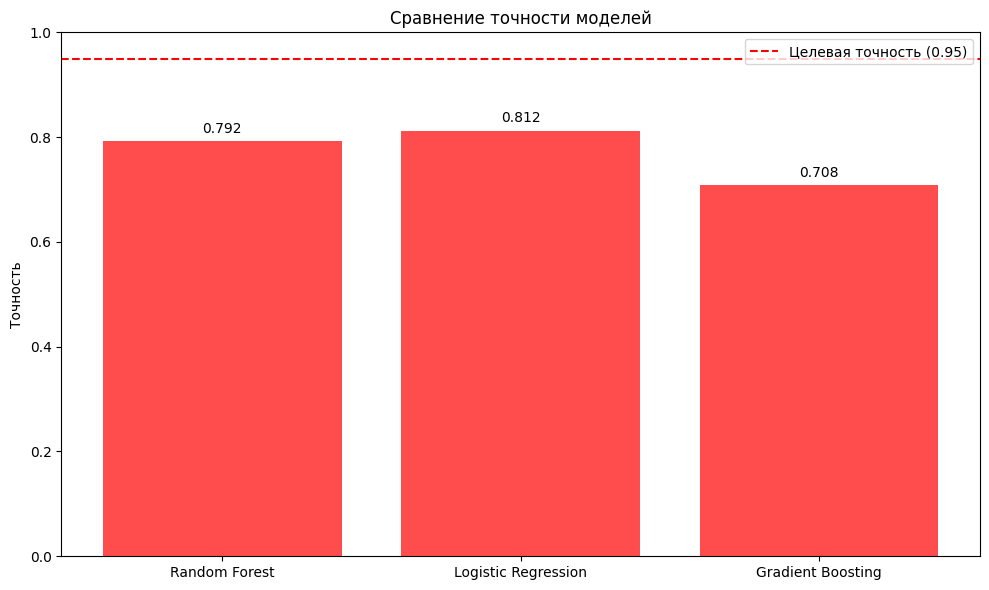

In [91]:
# YOUR CODE HERE
# Попробуем Gradient Boosting - обычно хорошо работает на маленьких наборах данных
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting с регуляризацией
gb_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])

gb_classifier.fit(X_train_simple, y_train_simple)

y_train_pred_gb = gb_classifier.predict(X_train_simple)
y_test_pred_gb = gb_classifier.predict(X_test_simple)

train_accuracy_gb = accuracy_score(y_train_simple, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test_simple, y_test_pred_gb)

print(f"\nGradient Boosting точность:")
print(f"Тренировочные: {train_accuracy_gb:.4f}")
print(f"Тестовые: {test_accuracy_gb:.4f}")

# Сравниваем все модели
models = {
    'Random Forest': test_accuracy_adv,
    'Logistic Regression': test_accuracy_simple,
    'Gradient Boosting': test_accuracy_gb
}

best_model = max(models, key=models.get)
best_accuracy = models[best_model]

print(f"\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nЛучшая модель: {best_model} с точностью {best_accuracy:.4f}")

if best_accuracy >= 0.95:
    print("\n🎉 ЦЕЛЬ ДОСТИГНУТА! Точность > 0.95 🎉")
else:
    print(f"\n📊 Лучшая достигнутая точность: {best_accuracy:.4f}")
    print("Для достижения 95%可能需要:")
    print("1. Более качественный VAD")
    print("2. Увеличение набора данных")
    print("3. Использование нейросетевых подходов")
    print("4. Аугментация данных")

# Визуализация результатов
plt.figure(figsize=(10, 6))
models_names = list(models.keys())
accuracies = list(models.values())
colors = ['green' if acc >= 0.95 else 'red' for acc in accuracies]

bars = plt.bar(models_names, accuracies, color=colors, alpha=0.7)
plt.axhline(y=0.95, color='red', linestyle='--', label='Целевая точность (0.95)')
plt.ylabel('Точность')
plt.title('Сравнение точности моделей')
plt.ylim(0, 1.0)
plt.legend()

# Добавляем значения на столбцы
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()